# Exploratory Data Analysis for Scrabble Dataset

## Introduction
This notebook explores the Scrabble dataset, aiming to understand the data's structure, characteristics, and potential insights. The dataset includes metadata about games, turn-by-turn gameplay details, and player ratings.

### Dataset Files:
1. **games.csv:** Metadata for each game.
2. **turns.csv:** Turn-by-turn data for each game.
3. **train.csv:** Player ratings and scores before each game.
4. **test.csv:** Player ratings (to be predicted) and scores.

## Import Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read Datasets

In [58]:
games = pd.read_csv('../data/games.csv')
turns = pd.read_csv('../data//turns.csv')
train = pd.read_csv('../data//train.csv')
test = pd.read_csv('../data//test.csv')

# Brief to Datasets

In [59]:
print("Games Dataset:")
display(games.head())

print("Turns Dataset:")
display(turns.head())

print("Train Dataset:")
display(train.head())

print("Test Dataset:")
display(test.head())

Games Dataset:


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,08/26/2022 3:38,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,08/10/2022 19:19,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,09/04/2022 8:04,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,09/12/2022 2:36,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,09/06/2022 4:31,NWL20,1200,0,CASUAL,1,642.688722


Turns Dataset:


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


Train Dataset:


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


Test Dataset:


,game_id,nickname,score,rating
0,2,Super,488,NaN
1,2,BetterBot,401,2000.0
2,7,STEEBot,377,2082.0
3,7,Priya1,379,NaN
4,11,STEEBot,334,1829.0


# Data Overview
To understand the structure of the data, I will:
1. Inspect column names and data types.
2. Check for missing values.
3. Analyze basic statistics for numerical columns.

## Games dataset

In [60]:
print("Games Dataset Info:")
print(games.info())

Games Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB
None


### Games Dataset: Summary of Observations
1. **Dataset Size:**  
   - The dataset contains **72,773 entries** and **12 columns**.  
   - Each entry corresponds to metadata for a single Scrabble game.  

2. **Data Types:**  
   - **6 object columns:** e.g., `first`, `time_control_name`, `lexicon`.  
   - **5 integer columns:** e.g., `initial_time_seconds`, `winner`.  
   - **1 float column:** `game_duration_seconds`.  

3. **Key Features:**  
   - `game_id`: Unique identifier for each game.  
   - `winner`: Encoded as an integer, 1 - if human win, 0 - else.
   - `time_control_name` and `initial_time_seconds`: Describe the game's time controls.  
   - `rating_mode`: Indicates whether the game was rated or casual.  

4. **Missing Values:**  
   - No missing values in this dataset (`Non-Null Count` equals total rows for all columns).  

5. **Potential Next Steps:**  
   - Explore the distribution of categorical columns (`time_control_name`, `rating_mode`, etc.).  
   - Analyze numerical columns like `game_duration_seconds` to understand game lengths.  
   - Parse or process `created_at` to extract useful temporal features (e.g., date, time).  


### Distribution of Categorical Columns

To better understand the `games` dataset, I will explore the distributions of key categorical columns: `time_control_name`, `rating_mode`, and `game_end_reason`. These columns provide insights into player preferences and game characteristics.


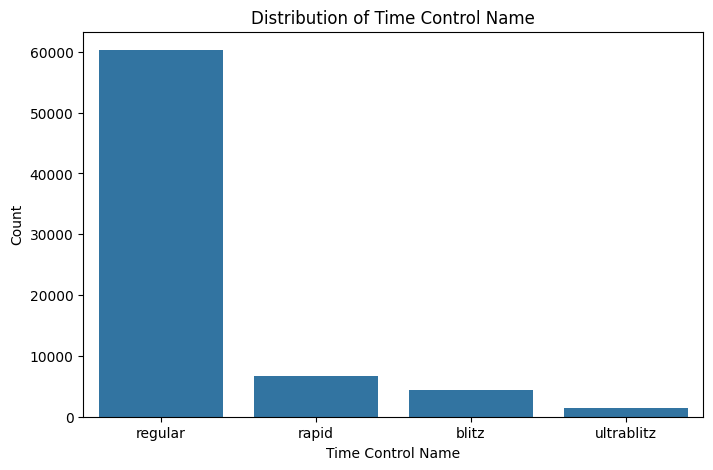

Plot saved to ../output_EDA/games_invest_graphs/time_control_distribution.png


In [62]:
# Distribution of time_control_name
output_path = '../output_EDA/games_invest_graphs/time_control_distribution.png'
plt.figure(figsize=(8, 5))
sns.countplot(x='time_control_name', data=games, order=games['time_control_name'].value_counts().index)
plt.title('Distribution of Time Control Name')
plt.xlabel('Time Control Name')
plt.ylabel('Count')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to {output_path}")

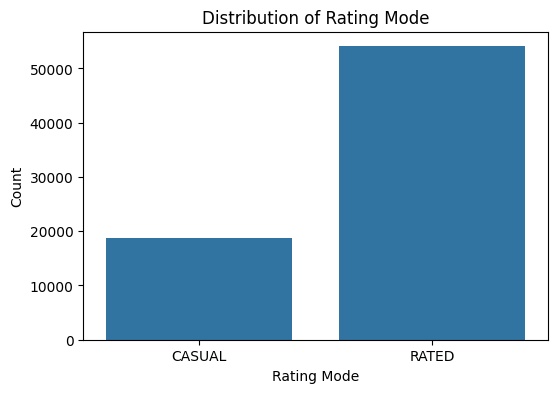

Plot saved to ../output_EDA/games_invest_graphs/rating_mode_distribution.png


In [63]:
# Distribution of rating_mode
output_path = '../output_EDA/games_invest_graphs/rating_mode_distribution.png'
plt.figure(figsize=(6, 4))
sns.countplot(x='rating_mode', data=games)
plt.title('Distribution of Rating Mode')
plt.xlabel('Rating Mode')
plt.ylabel('Count')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to {output_path}")


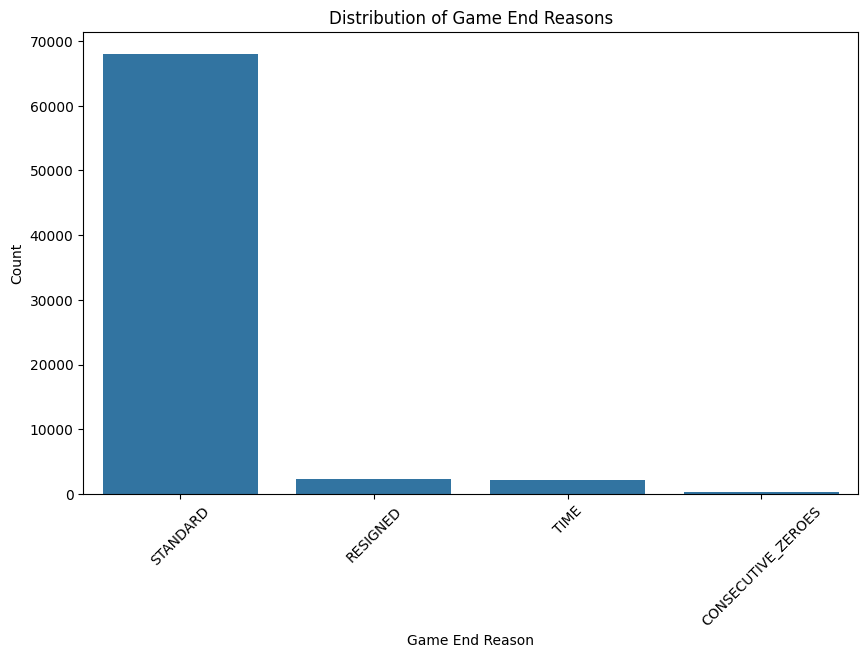

Plot saved to ../output_EDA/games_invest_graphs/game_end_reason_distribution.png


In [64]:
# Distribution of game_end_reason with vertical bars
output_path = '../output_EDA/games_invest_graphs/game_end_reason_distribution.png'
plt.figure(figsize=(10, 6))
sns.countplot(x='game_end_reason', data=games, order=games['game_end_reason'].value_counts().index)
plt.title('Distribution of Game End Reasons')
plt.xlabel('Game End Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to {output_path}")

### Observations from Categorical Analysis

1. **Time Control Types:**
   - "Regular" games are the most common, followed by "rapid" and "blitz".
   - This suggests that most players prefer longer game durations.

2. **Rating Mode:**
   - The majority of games are rated, indicating that players are more interested in competitive gameplay than casual games.

3. **Game End Reasons:**
   - Most games end due to a player winning, with a smaller number ending due to other reasons like timeouts or the six-zero rule.
   - This highlights that the dataset primarily captures complete games with clear outcomes.

### Analyzing Numerical Columns

Next, I will analyze the distributions of numerical columns: `game_duration_seconds`, `initial_time_seconds`, `increment_seconds`, and `max_overtime_minutes`. The goal is to identify trends, outliers, and relationships in these columns.


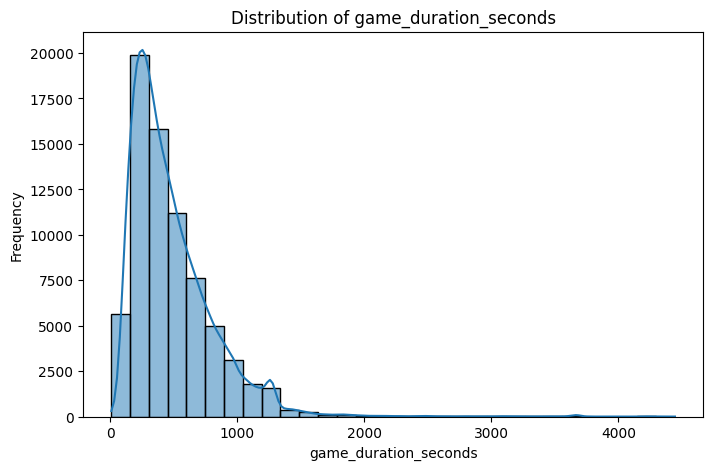

Saved: ../output_EDA/games_invest_graphs/numerical_distributions/game_duration_seconds_distribution.png


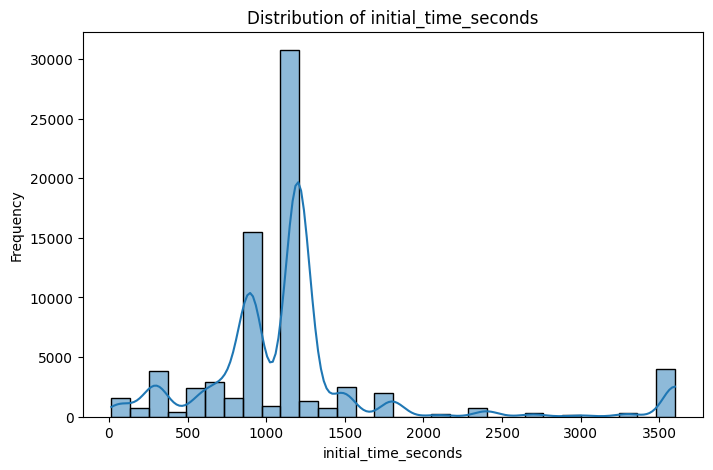

Saved: ../output_EDA/games_invest_graphs/numerical_distributions/initial_time_seconds_distribution.png


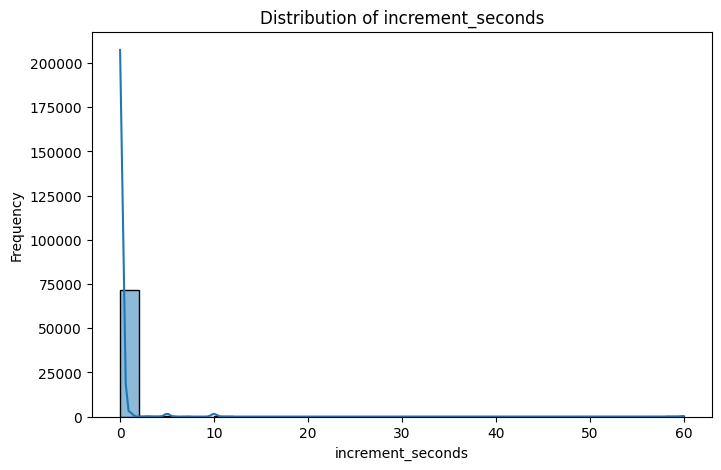

Saved: ../output_EDA/games_invest_graphs/numerical_distributions/increment_seconds_distribution.png


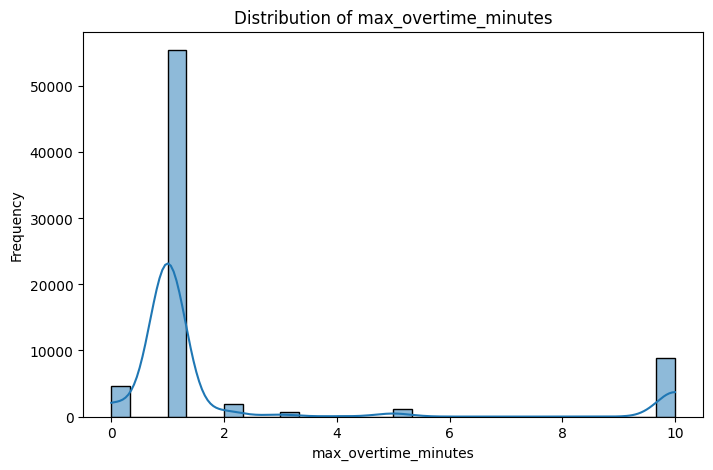

Saved: ../output_EDA/games_invest_graphs/numerical_distributions/max_overtime_minutes_distribution.png


In [67]:
import os

# Histograms for numerical columns
output_path = '../output_EDA/games_invest_graphs/numerical_distributions/'
os.makedirs(output_path, exist_ok=True)
numerical_columns = ['game_duration_seconds', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(games[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Save the plot to the specified path with a respective name
    plot_file = f'{output_path}{col}_distribution.png'
    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()  # Close the plot to free memory
    print(f"Saved: {plot_file}")

### Observations

#### 1. **Game Duration (Seconds):**
- The majority of games last between **0 and 1000 seconds**, with a clear peak around **200–400 seconds**.
- The distribution is right-skewed, with a long tail representing games that lasted up to **4000+ seconds**.
- These long-duration games might represent outliers or specific game types with longer time controls.

#### 2. **Initial Time (Seconds):**
- There are distinct peaks in the distribution, most notably around:
  - **600 seconds** (10 minutes).
  - **1200 seconds** (20 minutes).
  - **3600 seconds** (1 hour).
- These peaks correspond to predefined time controls in Scrabble (e.g., "blitz," "rapid," and "regular").
- The distribution is multimodal, reflecting the structured nature of the time controls.

#### 3. **Incremental Time (Seconds):**
- A significant majority of games have an incremental time of **0 seconds**, indicating no time added per turn.
- Very few games use higher incremental times, with values rarely exceeding **10 seconds**.
- The sharp peak at **0 seconds** suggests that most games are played without time increments.

#### 4. **Max Overtime (Minutes):**
- Most games allow a maximum overtime of **1 minutes**, as indicated by the sharp peak at this value.
- Another noticeable peak occurs at **10 minutes**, likely corresponding to specific time control settings.
- The distribution is right-skewed, with very few games allowing more than **10 minutes** of overtime.


### Temporal Analysis of `created_at`

The `created_at` column stores the timestamp for when each game was created. I will convert this column to datetime format and extract features like the day of the week and hour of the day to analyze trends in game activity.


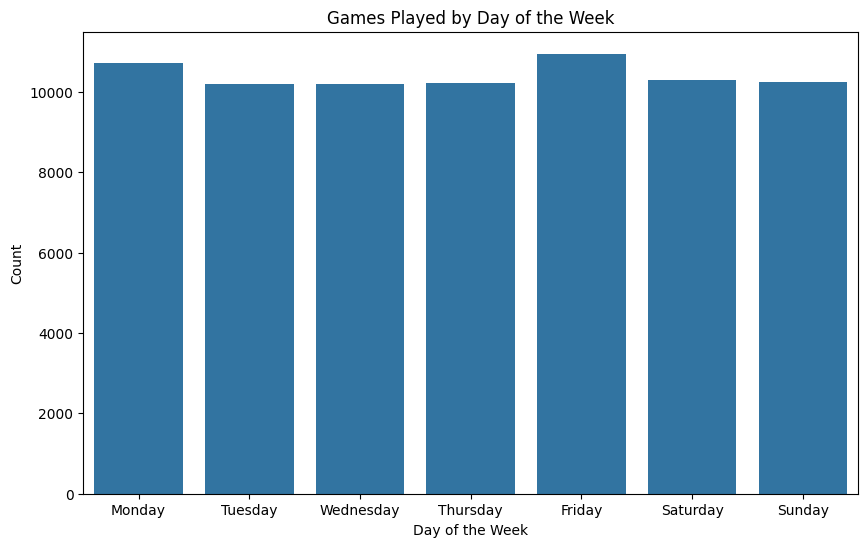

Saved: ../output_EDA/games_invest_graphs/time_analysis/games_by_day_of_week.png


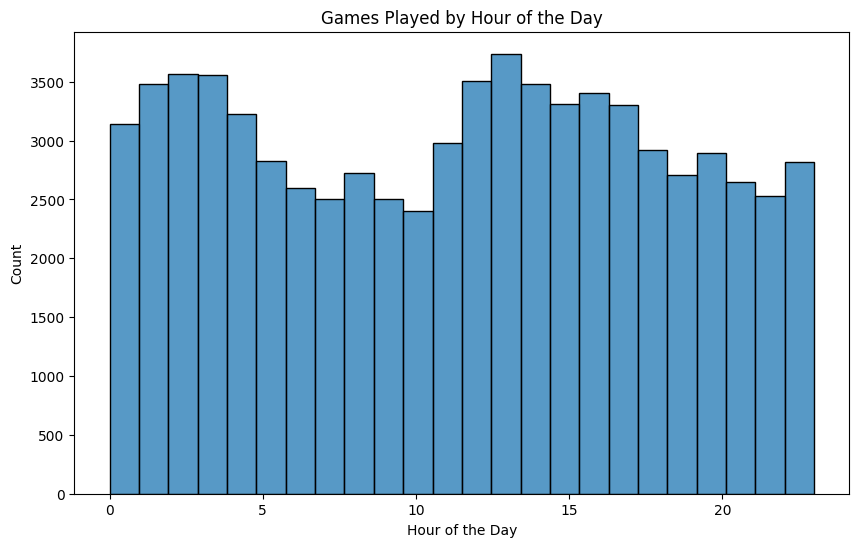

Saved: ../output_EDA/games_invest_graphs/time_analysis/games_by_hour_of_day.png


In [69]:
# Convert created_at to datetime and extract features
# Ensure the output directory exists
output_path = '../output_EDA/games_invest_graphs/time_analysis/'
os.makedirs(output_path, exist_ok=True)

# Convert created_at to datetime and extract features
games['created_at'] = pd.to_datetime(games['created_at'])
games['day_of_week'] = games['created_at'].dt.day_name()
games['hour'] = games['created_at'].dt.hour

# Games by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=games, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Games Played by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Save the plot
day_of_week_plot_path = f'{output_path}games_by_day_of_week.png'
plt.savefig(day_of_week_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"Saved: {day_of_week_plot_path}")

# Games by hour of the day
plt.figure(figsize=(10, 6))
sns.histplot(games['hour'], bins=24, kde=False)
plt.title('Games Played by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Save the plot
hour_of_day_plot_path = f'{output_path}games_by_hour_of_day.png'
plt.savefig(hour_of_day_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"Saved: {hour_of_day_plot_path}")


## Statistical Analysis

In [22]:
# Descriptive statistics for numerical columns
numerical_columns = ['game_duration_seconds', 'initial_time_seconds', 'increment_seconds', 'max_overtime_minutes']
stats = games[numerical_columns].describe().transpose()

print(stats)

                         count         mean         std        min  \
game_duration_seconds  72773.0   484.069347  333.563128   7.962989   
initial_time_seconds   72773.0  1198.034230  713.185219  15.000000   
increment_seconds      72773.0     0.228560    2.548020   0.000000   
max_overtime_minutes   72773.0     2.143707    2.989853   0.000000   

                              25%         50%          75%          max  
game_duration_seconds  250.172459   399.83415   633.424285  4444.821645  
initial_time_seconds   900.000000  1200.00000  1200.000000  3600.000000  
increment_seconds        0.000000     0.00000     0.000000    60.000000  
max_overtime_minutes     1.000000     1.00000     1.000000    10.000000  


### Descriptive Statistics Summary

#### 1. **Game Duration (Seconds):**
- **Count:** 72,773 games.
- **Mean:** 484.07 seconds (~8 minutes).
- **Standard Deviation:** 333.56 seconds.
- **Min:** 7.96 seconds (very short games, possibly incomplete or skipped games).
- **25th Percentile:** 250.17 seconds (~4 minutes).
- **50th Percentile (Median):** 399.83 seconds (~6.5 minutes).
- **75th Percentile:** 633.42 seconds (~10.5 minutes).
- **Max:** 4444.82 seconds (~74 minutes, indicating outliers or very slow games).

#### 2. **Initial Time (Seconds):**
- **Count:** 72,773 games.
- **Mean:** 1198.03 seconds (~20 minutes).
- **Standard Deviation:** 713.18 seconds.
- **Min:** 15 seconds (unusual game setups or custom configurations).
- **25th Percentile:** 900 seconds (~15 minutes).
- **50th Percentile (Median):** 1200 seconds (~20 minutes).
- **75th Percentile:** 1200 seconds (~20 minutes).
- **Max:** 3600 seconds (1 hour, common for "regular" games).

#### 3. **Increment Time (Seconds):**
- **Count:** 72,773 games.
- **Mean:** 0.23 seconds.
- **Standard Deviation:** 2.55 seconds.
- **Min:** 0 seconds (most games have no increment).
- **25th, 50th, and 75th Percentiles:** All 0 seconds.
- **Max:** 60 seconds (indicating specific time control configurations with increments).

#### 4. **Maximum Overtime (Minutes):**
- **Count:** 72,773 games.
- **Mean:** 2.14 minutes.
- **Standard Deviation:** 2.99 minutes.
- **Min:** 0 minutes (no overtime allowed).
- **25th Percentile:** 1 minute.
- **50th Percentile (Median):** 1 minute.
- **75th Percentile:** 1 minute.
- **Max:** 10 minutes (extended overtime allowed in some games).


In [23]:
# Identify outliers using IQR for game_duration_seconds
Q1 = games['game_duration_seconds'].quantile(0.25)
Q3 = games['game_duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = games[(games['game_duration_seconds'] < lower_bound) | (games['game_duration_seconds'] > upper_bound)]
print(f"Number of outliers in game_duration_seconds: {len(outliers)}")

Number of outliers in game_duration_seconds: 2511


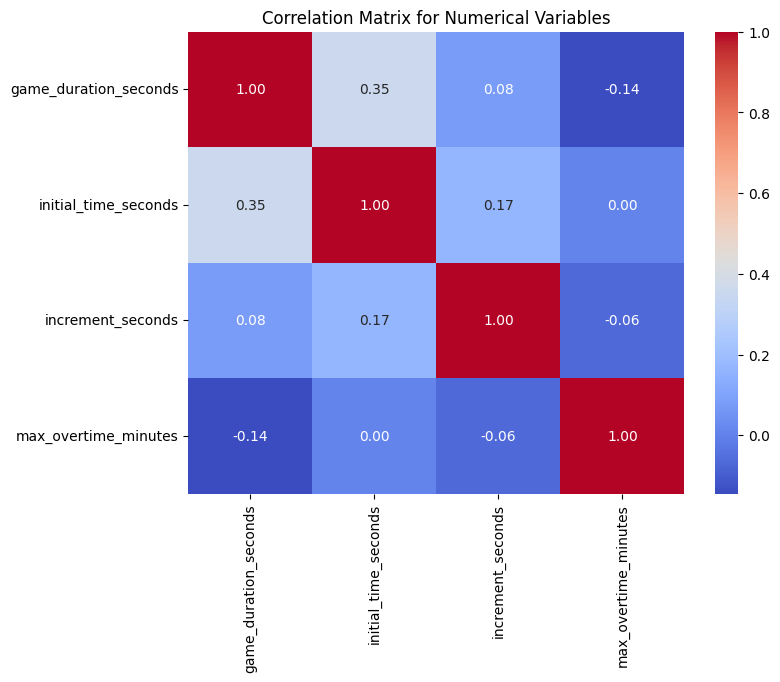

Saved: ../output_EDA/games_invest_graphs/numerical_distributions/correlation_matrix.png


In [70]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the output directory exists
output_path = '../output_EDA/games_invest_graphs/numerical_distributions/'

# Calculate the correlation matrix
correlation_matrix = games[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')

# Save the plot
heatmap_path = f'{output_path}correlation_matrix.png'
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved: {heatmap_path}")

### Correlation Analysis Observations

#### 1. **Game Duration (`game_duration_seconds`):**
- Moderately positively correlated with `initial_time_seconds` (**correlation = 0.35**):
  - Games with longer initial time settings tend to have longer durations, which aligns with expectations.
- Weak positive correlation with `increment_seconds` (**correlation = 0.08**):
  - Incremental time has a minimal effect on overall game duration.

#### 2. **Initial Time (`initial_time_seconds`):**
- Weak positive correlation with `increment_seconds` (**correlation = 0.17**):
  - Games with higher initial time may also have small increments.
- No significant correlation with `max_overtime_minutes` (**correlation = 0.00**):
  - Maximum overtime does not depend on initial time settings.

#### 3. **Increment Time (`increment_seconds`):**
- Weak correlation with all other variables, indicating that increment time is not a major factor in game outcomes or settings.

#### 4. **Maximum Overtime (`max_overtime_minutes`):**
- Negatively correlated with `game_duration_seconds` (**correlation = -0.14**):
  - Games with a higher maximum overtime tend to have slightly shorter regular durations, possibly due to players relying on overtime for time extensions.
- No significant correlations with other variables.

---

### Key Insights:
- The strongest correlation is between `game_duration_seconds` and `initial_time_seconds` (**0.35**), confirming that the initial time setting has the largest impact on game length.
- Other variables, such as `increment_seconds` and `max_overtime_minutes`, show weaker relationships with game duration and each other, indicating their effects are more situational or minor.


In [25]:
# Group statistics by time_control_name for game_duration_seconds
group_stats = games.groupby('time_control_name')['game_duration_seconds'].agg(['mean', 'median', 'std', 'min', 'max'])
print(group_stats)

                         mean      median         std        min          max
time_control_name                                                            
blitz              198.301912  181.044898   81.743754  55.345469   370.396894
rapid              339.201886  310.282429  162.221853  48.609844   851.979960
regular            529.683052  447.619144  342.535194   7.962989  4444.821645
ultrablitz         112.648425  117.967548   13.013730  42.030392   130.420586


## Key Points Summary for `games.csv` Dataset

### General Overview:
- The dataset contains **72,773 entries** with **12 columns**, and no missing values.
- The dataset provides metadata for Scrabble games, including player settings, game configurations, and durations.

### Key Observations:

#### 1. **Categorical Variables:**
- **Time Control:**
  - "Regular" is the most popular time control, followed by "Rapid" and "Blitz."
- **Game End Reason:**
  - Most games end due to a winner, while others end due to timeouts or special rules.
- **Rating Mode:**
  - The majority of games are "Rated," indicating competitive play.

#### 2. **Numerical Variables:**
- **Game Duration:**
  - The average game duration is **484 seconds (~8 minutes)**, with some games lasting over **4,400 seconds (~74 minutes)**, indicating potential outliers.
- **Initial Time:**
  - Commonly set to **900 seconds (~15 minutes)** or **1,200 seconds (~20 minutes)**, reflecting structured time control rules.
- **Increment Time:**
  - Most games have no increment time, with the majority of values at **0 seconds**.
- **Max Overtime:**
  - The typical maximum overtime allowed is **1 minute**, with some games extending up to **10 minutes.**

#### 3. **Statistical Analysis:**
- **Correlations:**
  - `game_duration_seconds` is moderately positively correlated with `initial_time_seconds` (**correlation = 0.35**).
  - Other variables, such as `increment_seconds` and `max_overtime_minutes`, show weak or negligible correlations with game duration.

### Key Insights:
- **Game Configuration:** Most games are played with structured time controls, and initial time has the largest impact on game duration.
- **Outliers:** Game duration shows potential outliers with very long durations, which may need further investigation.

---

This completes the analysis of the `games.csv` dataset. Moving forward, I will analyze the `turns.csv` dataset to understand turn-by-turn gameplay dynamics.


## Turns Dataset Analysis

The `turns.csv` dataset contains detailed turn-by-turn gameplay data for each Scrabble game. In this section, I will:
1. Inspect the structure of the dataset.
2. Identify any missing or unusual values.
3. Explore key features to understand player actions, scores, and gameplay patterns.
4. Derive insights that can support predictive modeling.

---

### Dataset Overview

The `turns.csv` dataset contains the following columns:
1. `game_id`: Unique identifier for the game.
2. `turn_number`: The turn number in the game.
3. `nickname`: The player's username on Woogles.io.
4. `rack`: The player's current rack (letters available to play).
5. `location`: Where the player placed their move on the board (NA for test set or if no play was made).
6. `move`: Tiles played by the player (NA for test set; "--" if the player passed; specific codes for challenges or exchanges).
7. `points`: Points scored on the turn (can be negative in some cases, such as challenges).
8. `score`: The player's cumulative score after the turn.
9. `turn_type`: Type of turn played ("Play," "Exchange," "Pass," etc.).

The analysis starts with inspecting the dataset structure and basic statistics.


### Inspecting the Dataset

First, I will load the dataset and check its structure, column types, and any missing values.


In [71]:
# Display the first few rows
print("First few rows of the dataset:")
display(turns.head())

# Dataset information
print("Dataset Info:")
print(turns.info())

# Check for missing values
print("Missing Values:")
print(turns.isnull().sum())


First few rows of the dataset:


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB
None
Missing Values:
game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64


## Dataset Inspection and Missing Values Analysis

### Dataset Overview
- The `turns.csv` dataset contains **2,005,498 entries** and **9 columns**.
- Columns are a mix of data types:
  - **4 integer columns**: `game_id`, `turn_number`, `points`, `score`.
  - **5 object columns**: `nickname`, `rack`, `location`, `move`, `turn_type`.
- Total memory usage is approximately **137.7 MB**.

### Missing Values Summary
- **Columns with Missing Values:**
  - `rack`: **69,390 missing values**. Likely due to scenarios where the rack wasn't updated or recorded (e.g., at game start or during exchanges).
  - `location`: **132,239 missing values**. Missing for test set games or when players didn’t make a move.
  - `move`: **454 missing values**. Likely due to errors or invalid moves.
  - `turn_type`: **395 missing values**. Occurs when turn type is not recorded or valid.

### Observations
1. The dataset is large, with over 2 million rows, providing detailed turn-by-turn gameplay data.
2. Missing values in `rack`, `location`, and `move` are likely valid for gameplay scenarios such as skipped moves or exchanges.
3. Missing values in `turn_type` need further investigation to determine their impact on analysis.
4. The dataset has no missing values in key columns like `game_id`, `turn_number`, `points`, and `score`.

### Exploring Key Features

In this section, I will explore the following key features:
1. **Turn Type (`turn_type`)**: Analyze the distribution of turn types.
2. **Points (`points`)**: Explore the distribution of points scored per turn.
3. **Cumulative Score (`score`)**: Examine player scores over the course of games.
4. **Turn Dynamics**: Analyze turn patterns (e.g., average points per turn, most common turn types).


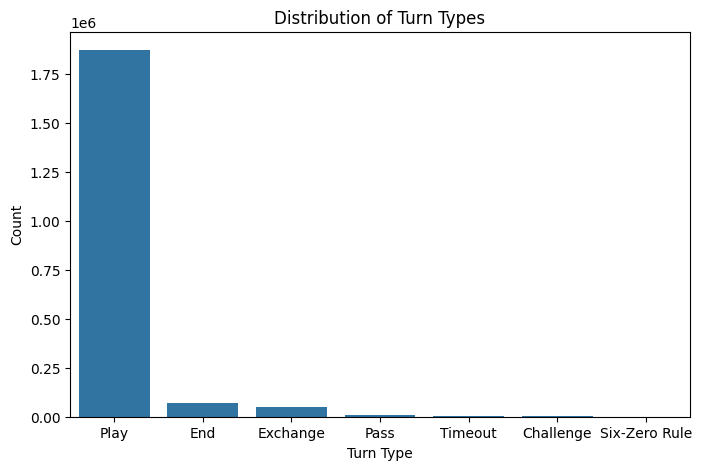

Saved: ../output_EDA/turns_invest_graphs/basic_invest/turn_type_distribution.png


In [77]:
# Distribution of turn types
output_path = '../output_EDA/turns_invest_graphs/basic_invest/'

# Create and save the plot
plt.figure(figsize=(8, 5))
sns.countplot(x='turn_type', data=turns, order=turns['turn_type'].value_counts().index)
plt.title('Distribution of Turn Types')
plt.xlabel('Turn Type')
plt.ylabel('Count')

# Save the figure
turns_plot_path = f'{output_path}turn_type_distribution.png'
plt.savefig(turns_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved: {turns_plot_path}")

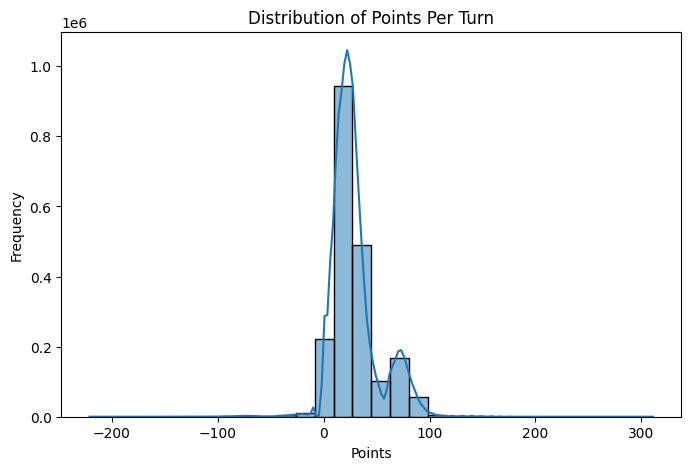

Saved: ../output_EDA/turns_invest_graphs/basic_invest/points_per_turn_distribution.png


In [78]:
# Distribution of points per turn
output_path = '../output_EDA/turns_invest_graphs/basic_invest/'

# Create and save the plot
plt.figure(figsize=(8, 5))
sns.histplot(turns['points'], bins=30, kde=True)
plt.title('Distribution of Points Per Turn')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Save the figure
points_plot_path = f'{output_path}points_per_turn_distribution.png'
plt.savefig(points_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved: {points_plot_path}")

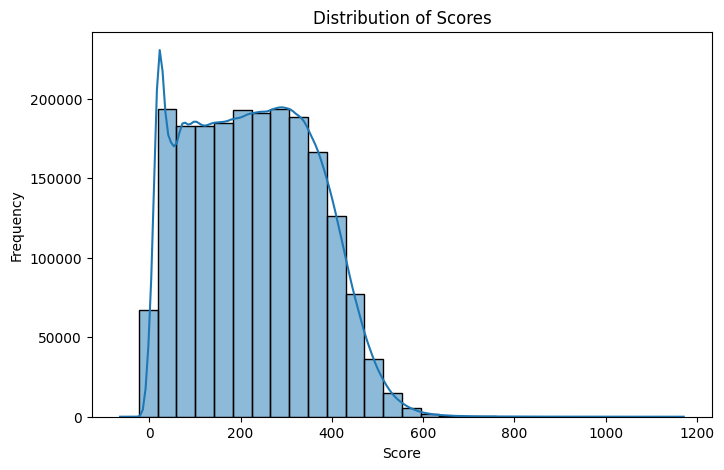

Saved: ../output_EDA/turns_invest_graphs/basic_invest/score_distribution.png


In [79]:
output_path = '../output_EDA/turns_invest_graphs/basic_invest/'

# Create and save the plot
plt.figure(figsize=(8, 5))
sns.histplot(turns['score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Save the figure
score_plot_path = f'{output_path}score_distribution.png'
plt.savefig(score_plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved: {score_plot_path}")

C:\Users\liavm\AppData\Local\Temp\ipykernel_14488\2137569166.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turn_type_points.index, y=turn_type_points.values, palette="viridis")


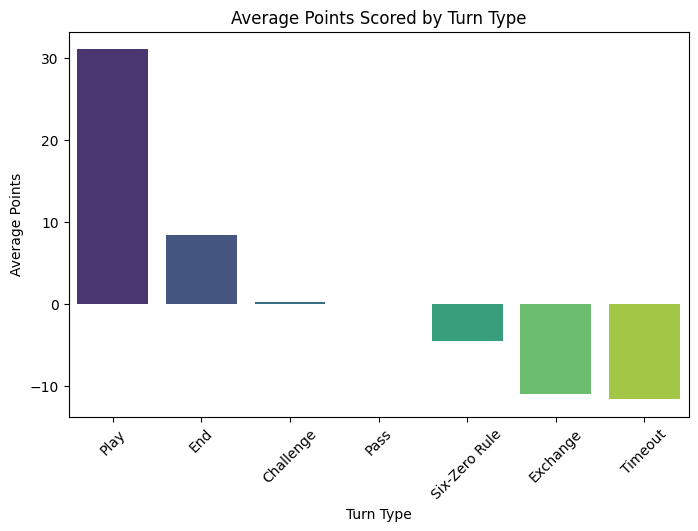

Saved: ../output_EDA/turns_invest_graphs/advanced_invest/average_points_by_turn_type.png


In [83]:
output_path = '../output_EDA/turns_invest_graphs/advanced_invest/'

# Group by turn_type and calculate average points per turn type
turn_type_points = turns.groupby('turn_type')['points'].mean().sort_values(ascending=False)

# Plot average points per turn type
plt.figure(figsize=(8, 5))
sns.barplot(x=turn_type_points.index, y=turn_type_points.values, palette="viridis")
plt.title('Average Points Scored by Turn Type')
plt.xlabel('Turn Type')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.show()

# Save the figure
turn_type_points_plot_path = f'{output_path}average_points_by_turn_type.png'
plt.savefig(turn_type_points_plot_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"Saved: {turn_type_points_plot_path}")


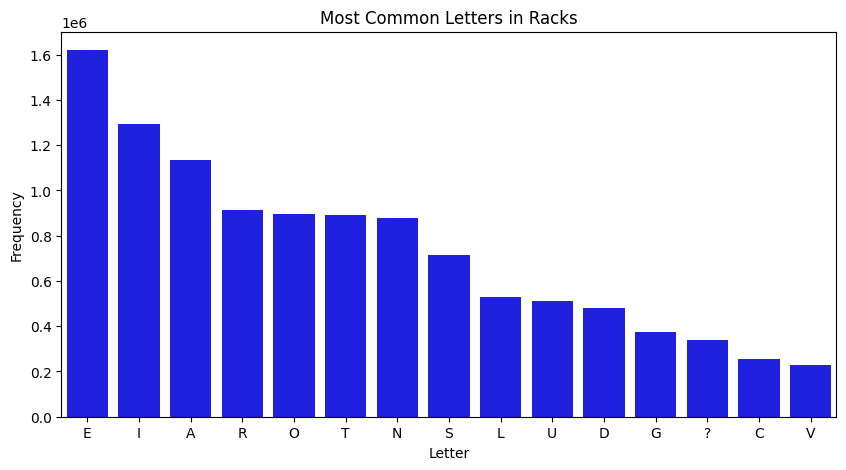

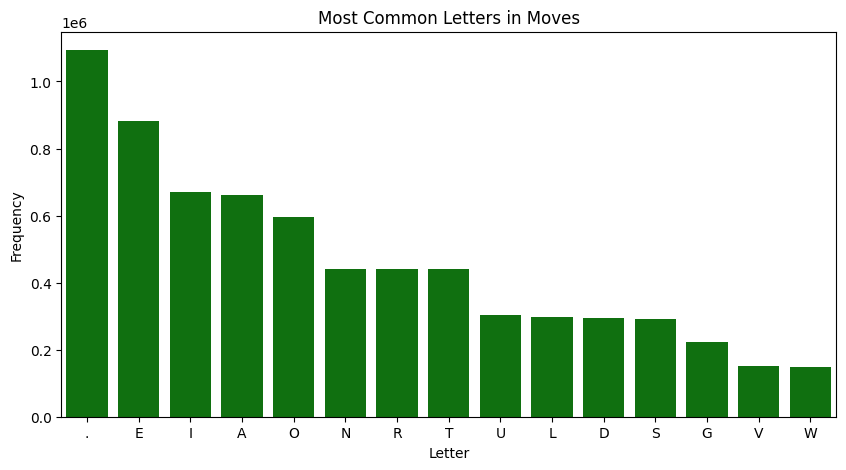

Saved rack analysis to: ../output_EDA/turns_invest_graphs/advanced_invest/most_common_letters_rack.png
Saved move analysis to: ../output_EDA/turns_invest_graphs/advanced_invest/most_common_letters_move.png


In [85]:
output_path_racks = '../output_EDA/turns_invest_graphs/advanced_invest/most_common_letters_rack.png'
output_path_moves = '../output_EDA/turns_invest_graphs/advanced_invest/most_common_letters_move.png'

from collections import Counter

# Combine all rack and move data into a single string
all_racks = ''.join(turns['rack'].dropna())
all_moves = ''.join(turns['move'].dropna())

# Count letter frequencies
rack_freq = Counter(all_racks)
move_freq = Counter(all_moves)

# Convert to DataFrame for visualization
rack_df = pd.DataFrame(rack_freq.items(), columns=['Letter', 'Frequency']).sort_values(by='Frequency', ascending=False)
move_df = pd.DataFrame(move_freq.items(), columns=['Letter', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot letter frequencies in rack
plt.figure(figsize=(10, 5))
sns.barplot(x='Letter', y='Frequency', data=rack_df.head(15), color="blue")
plt.title('Most Common Letters in Racks')
plt.savefig(output_path_racks, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Plot letter frequencies in moves
plt.figure(figsize=(10, 5))
sns.barplot(x='Letter', y='Frequency', data=move_df.head(15), color="green")
plt.title('Most Common Letters in Moves')
plt.savefig(output_path_moves, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved rack analysis to: {output_path_racks}")
print(f"Saved move analysis to: {output_path_moves}")


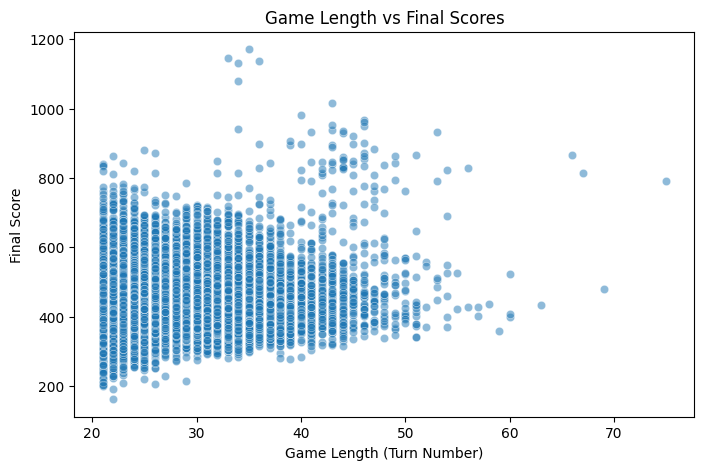

Correlation between game length and final scores:
             turn_number     score
turn_number     1.000000 -0.133764
score          -0.133764  1.000000
Saved scatter plot to: ../output_EDA/turns_invest_graphs/advanced_invest/game_length_vs_score.png


In [86]:
output_path_scatter = '../output_EDA/turns_invest_graphs/advanced_invest/game_length_vs_score.png'

# Group by game_id to calculate final turn_number and final scores
game_stats = turns.groupby('game_id').agg({'turn_number': 'max', 'score': 'max'}).reset_index()

# Plot correlation between turn_number and final score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='turn_number', y='score', data=game_stats, alpha=0.5)
plt.title('Game Length vs Final Scores')
plt.xlabel('Game Length (Turn Number)')
plt.ylabel('Final Score')
plt.savefig(output_path_scatter, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Correlation analysis
correlation = game_stats[['turn_number', 'score']].corr()
print("Correlation between game length and final scores:")
print(correlation)

print(f"Saved scatter plot to: {output_path_scatter}")


## Analyzing Features Relevant to Player Rank Prediction

### **Average Points Per Turn**
#### Goal:
Evaluate the distribution of average points scored per turn for each player (`nickname`) to identify trends among high-scoring players.


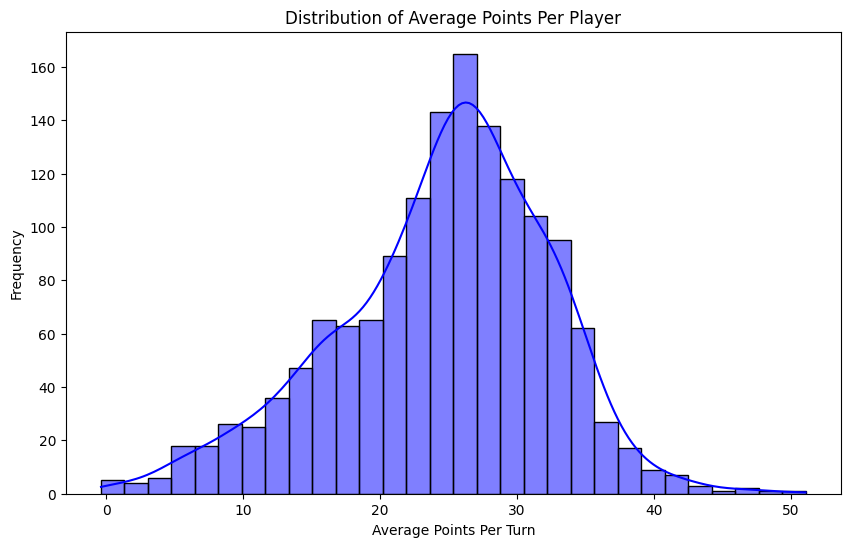

Saved histogram to: ../output_EDA/turns_invest_graphs/relevant_to_rank/avg_points_per_player_distribution.png


In [87]:
output_path_hist = '../output_EDA/turns_invest_graphs/relevant_to_rank/avg_points_per_player_distribution.png'

# Calculate average points per turn for each player
avg_points_per_player = turns.groupby('nickname')['points'].mean().reset_index()
avg_points_per_player.columns = ['nickname', 'avg_points']

# Plot distribution of average points per player
plt.figure(figsize=(10, 6))
sns.histplot(avg_points_per_player['avg_points'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Points Per Player')
plt.xlabel('Average Points Per Turn')
plt.ylabel('Frequency')
plt.savefig(output_path_hist, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved histogram to: {output_path_hist}")


## Train Dataset Analysis
The `train.csv` dataset contains metadata for Scrabble games, including player ratings and final scores. In this section, I will:

- Inspect the structure of the dataset.
- Identify any missing or unusual values.
- Explore key features such as player ratings and final scores to understand their impact on player rankings.
- Derive insights that can support predictive modeling.

---

### Dataset Overview
The `train.csv` dataset contains the following columns:

- **game_id**: Unique identifier for the game.
- **nickname**: The player's username on Woogles.io.
- **score**: Final score achieved by the player in the game.
- **rating**: The player's rating before the game was played.

The analysis begins with inspecting the dataset structure and basic statistics.

In [88]:
# Display dataset information and check for missing values
print("Dataset Info:")
print(train.info())
print("\nMissing Values:")
print(train.isnull().sum())

# Display the first few rows of the dataset
train.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB
None

Missing Values:
game_id     0
nickname    0
score       0
rating      0
dtype: int64


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


### Dataset Observations

#### Structure:
- The dataset contains **100,820 entries** and **4 columns**:
  - `game_id`: Unique identifier for each game (integer).
  - `nickname`: Player's username (string).
  - `score`: Final score achieved by the player in the game (integer).
  - `rating`: Player's rating before the game was played (integer).

#### Data Types:
- 3 numerical columns (`game_id`, `score`, `rating`) and 1 categorical column (`nickname`).

#### Missing Values:
- No missing values in the dataset. All columns are complete, ensuring no immediate preprocessing is required for null handling.

#### Initial Observations:
- The `score` and `rating` columns are likely to be highly relevant for predicting player rank.
- The `nickname` column can provide insights into individual player performance but might require encoding if used as a feature.

---

### Next Step: Distribution of Key Features

#### Description:
Analyze the distribution of `rating` and `score` to understand the variation in player performance and pre-game ratings.


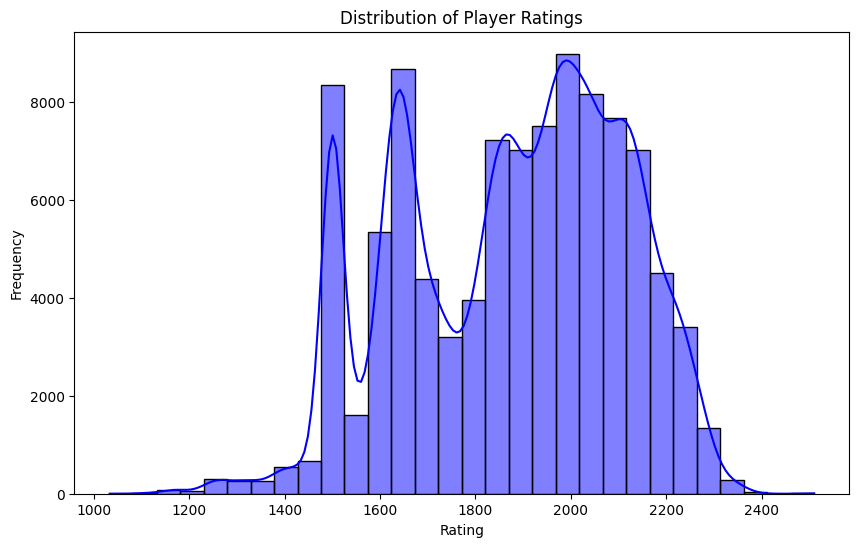

Saved player rating distribution to: ../output_EDA/train_invest_graph/player_rating_distribution.png


In [89]:
output_path_rating_distribution = '../output_EDA/train_invest_graph/player_rating_distribution.png'

# Plot the distribution of player ratings
plt.figure(figsize=(10, 6))
sns.histplot(train['rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig(output_path_rating_distribution, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved player rating distribution to: {output_path_rating_distribution}")


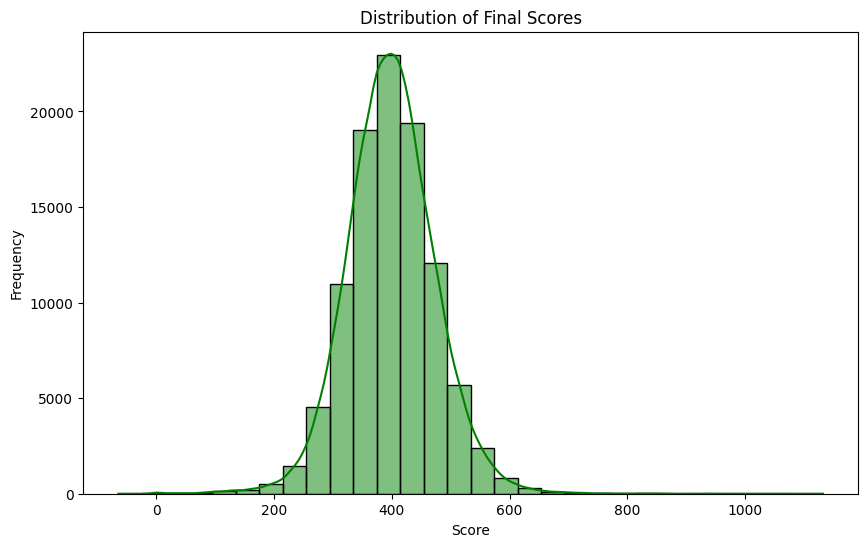

Saved final scores distribution to: ../output_EDA/train_invest_graph/final_scores_distribution.png


In [90]:
output_path_final_scores = '../output_EDA/train_invest_graph/final_scores_distribution.png'

# Plot the distribution of final scores
plt.figure(figsize=(10, 6))
sns.histplot(train['score'], bins=30, kde=True, color='green')
plt.title('Distribution of Final Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig(output_path_final_scores, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved final scores distribution to: {output_path_final_scores}")


### Observations: Distribution of Player Ratings and Final Scores

#### Player Ratings:
1. **Multimodal Distribution**:
   - The player ratings exhibit a multimodal distribution, with notable peaks around **1600**, **1800**, and **2000**.
   - These peaks may correspond to common skill brackets or rating tiers among players.

2. **Range**:
   - Ratings range from approximately **1200** to **2400**, indicating a diverse range of skill levels.

3. **Skewness**:
   - There is a slight right skew in the distribution, with fewer players at the higher end of the rating spectrum.

---

#### Final Scores:
1. **Normal Distribution**:
   - The final scores are approximately normally distributed, with the majority of players scoring between **300 and 500 points**.

2. **Mean and Spread**:
   - The mean score appears to be centered around **400 points**, with a relatively narrow spread, suggesting consistency in gameplay outcomes.

3. **Outliers**:
   - A few outliers exceed **600 points**, likely representing exceptional games or highly skilled players.

---

### Next Step: Correlation Analysis

#### Description:
Analyze the correlation between `rating` and `score` to uncover the strength of the relationship between pre-game ratings and game performance.


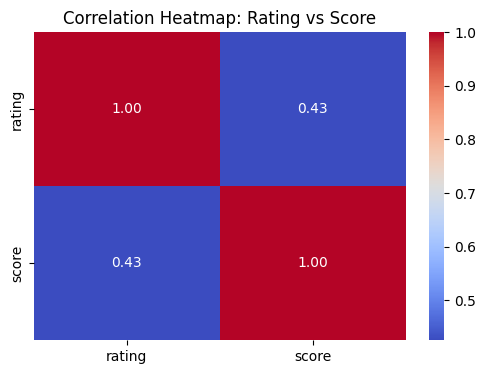

Saved correlation heatmap to: ../output_EDA/train_invest_graph/rating_vs_score_correlation_heatmap.png


In [91]:
output_path_correlation_heatmap = '../output_EDA/train_invest_graph/rating_vs_score_correlation_heatmap.png'

# Calculate correlations
correlations = train[['rating', 'score']].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Rating vs Score')
plt.savefig(output_path_correlation_heatmap, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved correlation heatmap to: {output_path_correlation_heatmap}")


### Correlation Analysis: Rating vs Score

#### Observations:
1. **Moderate Positive Correlation**:
   - The correlation coefficient between `rating` and `score` is **0.43**, indicating a moderate positive relationship.
   - Players with higher pre-game ratings tend to achieve higher final scores, but the relationship is not strong enough to be the sole determinant.

2. **Implications for Predictive Modeling**:
   - While `score` provides useful information about player performance, additional features will likely be needed to accurately predict `rating`.
   - This highlights the importance of incorporating other gameplay and strategic metrics (e.g., points per turn, turn types) into the model.

---

### Next Step: Investigating Player-Level Aggregates

#### Description:
Analyze player-level aggregates (e.g., average scores, number of games played) to identify patterns and trends that could enhance rank prediction.


             nickname   avg_score  total_games   avg_rating
0          0188889876   15.000000            1  1979.000000
1          0927399533  237.578947           19  1484.473684
2                   1  356.500000            2  1632.000000
3          171_selene  328.400000            5  1931.000000
4     220674_ZAVEPHUA  304.300000           30  1551.033333
...               ...         ...          ...          ...
1022             zman  424.333333           15  1748.733333
1023           zomban  369.600000            5  1900.000000
1024         zugzwang  392.555556            9  1980.333333
1025             zuzu  358.142857            7  1859.142857
1026          zyzzyva  399.500000            4  1636.250000

[1027 rows x 4 columns]


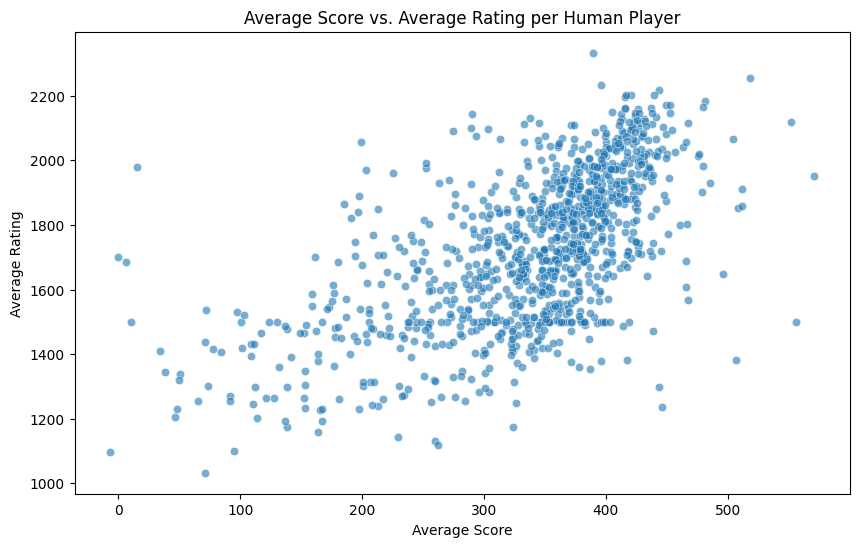

Saved scatter plot to: ../output_EDA/train_invest_graph/avg_score_vs_avg_rating_humans.png


In [92]:
output_path_avg_score_vs_rating = '../output_EDA/train_invest_graph/avg_score_vs_avg_rating_humans.png'

# Remove bot records
human_players = train[~train['nickname'].str.contains('Bot', case=True, na=False)]

# Calculate average score and number of games per human player
player_stats = human_players.groupby('nickname').agg(
    avg_score=('score', 'mean'),
    total_games=('game_id', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

print(player_stats)

# Plot average score vs. average rating for human players
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_stats, x='avg_score', y='avg_rating', alpha=0.6)
plt.title('Average Score vs. Average Rating per Human Player')
plt.xlabel('Average Score')
plt.ylabel('Average Rating')
plt.savefig(output_path_avg_score_vs_rating, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved scatter plot to: {output_path_avg_score_vs_rating}")


### Insights: Average Score vs. Average Rating per Player

#### Observations:
1. **Positive Correlation**:
   - Players with higher average scores tend to have higher average ratings.
   - This reinforces the notion that consistent performance (reflected in average scores) is a strong indicator of a player's skill level.

2. **Clustered Distribution**:
   - Most players have an average score between **300 and 500**, aligning with the earlier observation of final score distribution.
   - Average ratings for these players range from **1600 to 2000**, indicating that the majority of players fall within this skill bracket.

3. **Outliers**:
   - A few players with significantly lower average scores (<200) still maintain ratings above **1600**, suggesting other factors (e.g., strategic gameplay, turn types) might also influence ratings.

4. **Implications for Modeling**:
   - Average score is a valuable feature for predicting ratings but should be complemented with other gameplay and strategic metrics.
   - Outliers should be investigated further to understand additional factors influencing player ratings.

---

### Next Step: Investigating the Relationship Between Total Games Played and Average Rating

#### Description:
Analyze the relationship between the total number of games played (`total_games`) and average player rating to uncover the impact of experience on skill level.

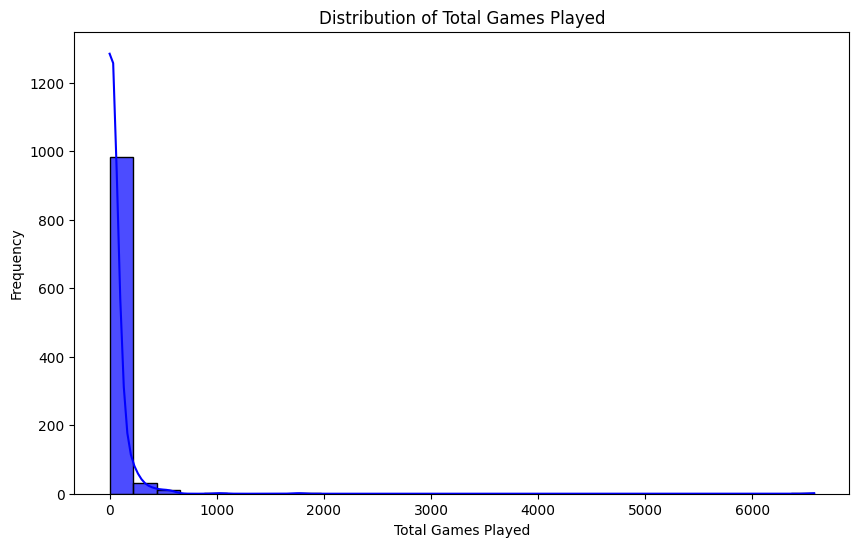

Saved distribution of total games played to: ../output_EDA/train_invest_graph/total_games_distribution.png


In [93]:
output_path_total_games_distribution = '../output_EDA/train_invest_graph/total_games_distribution.png'

# Plot distribution of total_games
plt.figure(figsize=(10, 6))
sns.histplot(player_stats['total_games'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Total Games Played')
plt.xlabel('Total Games Played')
plt.ylabel('Frequency')
plt.savefig(output_path_total_games_distribution, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved distribution of total games played to: {output_path_total_games_distribution}")


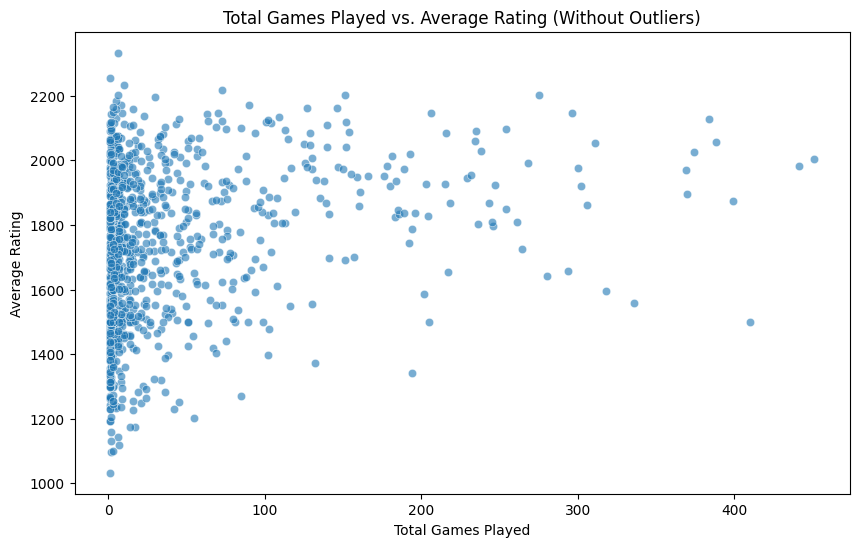

Saved scatter plot to: ../output_EDA/train_invest_graph/total_games_vs_avg_rating_no_outliers.png


In [94]:
output_path_filtered_total_games_vs_rating = '../output_EDA/train_invest_graph/total_games_vs_avg_rating_no_outliers.png'

# Remove outliers (e.g., players with total_games above 99th percentile)
threshold = player_stats['total_games'].quantile(0.99)
filtered_stats = player_stats[player_stats['total_games'] <= threshold]

# Re-plot total games vs. average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_stats, x='total_games', y='avg_rating', alpha=0.6)
plt.title('Total Games Played vs. Average Rating (Without Outliers)')
plt.xlabel('Total Games Played')
plt.ylabel('Average Rating')
plt.savefig(output_path_filtered_total_games_vs_rating, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Saved scatter plot to: {output_path_filtered_total_games_vs_rating}")


### Revised Observations:

1. **Lack of Correlation Between Games Played and High Ratings**:
   - The graph reveals that players with fewer games (e.g., 1 to 10 games) often have higher ratings compared to those with hundreds of games.
   - This suggests that the number of games played is not a direct indicator of a player's skill or rank.

2. **Wide Rating Distribution at Lower Game Counts**:
   - Players with fewer games show a broad range of ratings, from low to very high. This might indicate that players with prior experience or skills might play fewer games but achieve higher ratings.

3. **Stability of Ratings at Higher Game Counts**:
   - For players with over 100 games, ratings appear to stabilize around a certain range, indicating consistent performance regardless of the total games played.

---

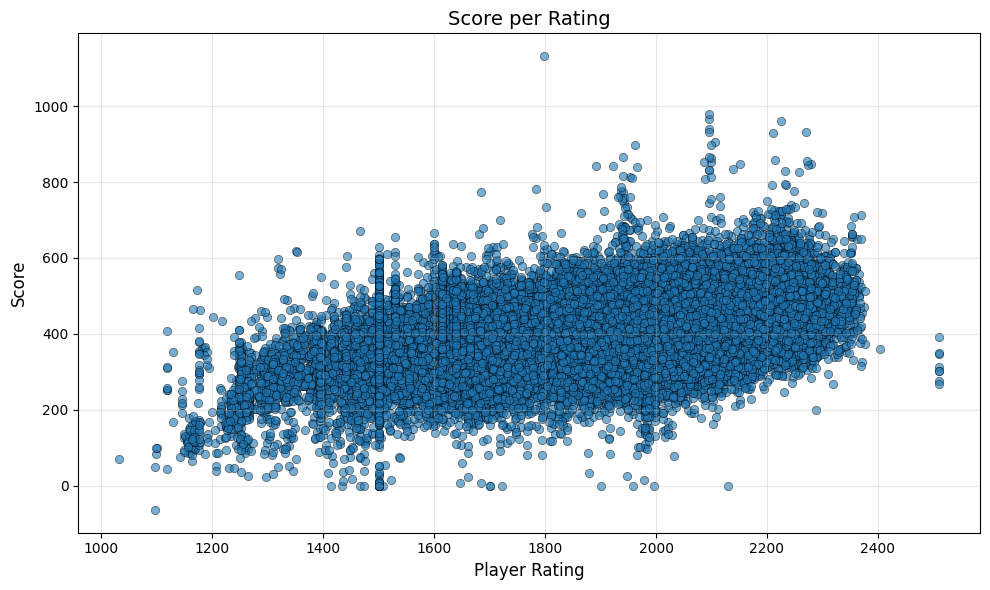

Score per Rating graph saved to: ../output_EDA/train_invest_graph/score_per_rating.png


In [104]:
output_path_score_rating = '../output_EDA/train_invest_graph/score_per_rating.png'

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='rating', y='score', alpha=0.6, edgecolor='k')
plt.title('Score per Rating', fontsize=14)
plt.xlabel('Player Rating', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
os.makedirs(os.path.dirname(output_path_score_rating), exist_ok=True)
plt.savefig(output_path_score_rating, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Score per Rating graph saved to: {output_path_score_rating}")

### Train Dataset Summary

The analysis of the train dataset provided several key observations:

1. **Player Rating Distribution**:
   - Player ratings are distributed in a range, with the majority clustering around 1600–2000.
   - Ratings appear to follow a normal distribution with some outliers.

2. **Score vs Rating**:
   - Higher player scores are moderately correlated with higher ratings, indicating that stronger players tend to score more in games.
---

# Try find More Intersting Correlations
After understading the table, I realize that I should seperate between human player to bot player. 
In addion I want to add more informative features to that table that will help me find a clue to the player rank.

## Let's start from begining and reload the games.csv dataset


In [96]:
games = pd.read_csv("../data/games.csv", parse_dates=["created_at"])
display(games.head())
print("\n")
display(games.tail())

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:00,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:00,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:00,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:00,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:00,NWL20,1200,0,CASUAL,1,642.688722


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
72768,72769,browndav,blitz,STANDARD,0,2022-09-07 13:24:00,CSW21,180,0,RATED,1,218.043751
72769,72770,HastyBot,regular,TIME,0,2022-09-04 00:13:00,CSW21,3600,0,RATED,1,3662.659287
72770,72771,HastyBot,regular,STANDARD,0,2022-09-19 03:28:00,ECWL,900,0,CASUAL,10,236.133634
72771,72772,Gtowngrad,regular,STANDARD,0,2022-08-31 15:57:00,NWL20,900,0,RATED,1,681.370077
72772,72773,HastyBot,regular,STANDARD,1,2022-08-27 09:13:00,CSW21,1200,0,RATED,1,719.720262


## I want to find all the bots in the game, let's find them and list their names

In [23]:
bot_names = train['nickname'][train['nickname'].str.contains('Bot', case=True, na=False)].unique()
bot_names_list = bot_names.tolist()

# Print the list of bot names
print("List of bot names:", bot_names_list)

List of bot names: ['BetterBot', 'STEEBot', 'HastyBot', 'MasterBot']


## Let's remember that points from turns.csv investigate

### Missing Values Summary
- **Columns with Missing Values:**
  - `rack`: **69,390 missing values**. Likely due to scenarios where the rack wasn't updated or recorded (e.g., at game start or during exchanges).
  - `location`: **132,239 missing values**. Missing for test set games or when players didn’t make a move.
  - `move`: **454 missing values**. Likely due to errors or invalid moves.
  - `turn_type`: **395 missing values**. Occurs when turn type is not recorded or valid.

### Let's look how the missing value represent in the turns.csv dataset

In [12]:
# Summary of missing values
missing_values_summary = turns.isnull().sum()

# Display missing values in each column
print("Missing Values Summary:")
print(missing_values_summary)

# Percentage of missing values
missing_percentage = (missing_values_summary / len(turns)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Investigate specific columns with missing values
columns_to_check = ['rack', 'location', 'move', 'turn_type']
for col in columns_to_check:
    print(f"\nExamples of missing values in column '{col}':")
    display(turns[turns[col].isnull()].head())  # Display rows with missing values for the column

Missing Values Summary:
game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64

Percentage of Missing Values:
game_id        0.000000
turn_number    0.000000
nickname       0.000000
rack           3.459988
location       6.593824
move           0.022638
points         0.000000
score          0.000000
turn_type      0.019696
dtype: float64

Examples of missing values in column 'rack':


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
26,1,27,stevy,NaN,NaN,(O),2,429,End
52,2,26,Super,NaN,NaN,(T),2,488,End
79,3,27,davidavid,NaN,NaN,(IQRRS),28,440,End
139,5,31,stevy,NaN,NaN,(NU),4,325,End
164,6,25,STEEBot,NaN,NaN,(BIU),10,427,End



Examples of missing values in column 'location':


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
26,1,27,stevy,NaN,NaN,(O),2,429,End
45,2,19,Super,?AOOUUV,NaN,-OOUUV,0,391,Exchange
49,2,23,Super,?AOORST,NaN,-,0,413,Pass
52,2,26,Super,NaN,NaN,(T),2,488,End
53,3,1,BetterBot,AJNOPQS,NaN,-JQ,0,0,Exchange



Examples of missing values in column 'move':


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
10249,377,27,NurdiniDelisha,ADFNTTU,O8,NaN,16,249,NaN
11125,409,22,akiff_faleel,AANU,14J,NaN,12,350,NaN
11428,420,23,Rick,AGINU,M12,NaN,19,409,NaN
14720,536,13,HastyBot,AAEILNN,F5,NaN,14,316,NaN
17266,630,2,220674_ZAVEPHUA,AAEINNR,7H,NaN,11,11,NaN



Examples of missing values in column 'turn_type':


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
10249,377,27,NurdiniDelisha,ADFNTTU,O8,NaN,16,249,NaN
11125,409,22,akiff_faleel,AANU,14J,NaN,12,350,NaN
11428,420,23,Rick,AGINU,M12,NaN,19,409,NaN
14720,536,13,HastyBot,AAEILNN,F5,NaN,14,316,NaN
17266,630,2,220674_ZAVEPHUA,AAEINNR,7H,NaN,11,11,NaN


## Preprocesses the turns.csv dataset to analyze player moves and rack usage:

### Why Rack Length and Usage Are Strong Features

- **Rack Length**: Shows how many tiles a player has. Skilled players balance their rack to maximize scoring opportunities.

- **Rack Usage**: Measures how many tiles are used in a turn. Higher usage often reflects strategic moves for higher scores.

These features highlight a player's ability to plan and adapt, key skills for top Scrabble players.


In [15]:
# Preprocess the data
turns['move'] = turns.move.str.replace('[()]', '', regex=True)
turns['rack_len'] = turns.rack.str.len()
turns['rack_usage'] = turns.move.str.count('[^\\.]') / turns.rack_len
turns['rack_usage'] = turns.rack_usage.fillna(-1)

# Save the updated dataset
output_path = '../preprocessed_data/new_turns.csv'
turns.to_csv(output_path, index=False)

print(f"Updated dataset saved to {output_path}")

Updated dataset saved to ../preprocessed_data/new_turns.csv


In [16]:
display(turns.tail())

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type,rack_len,rack_usage
2005493,72773,22,adola,ABINRRU,15N,IN,18,376,Play,7.0,0.285714
2005494,72773,23,HastyBot,EGHIIP,H12,.HIG,24,331,Play,6.0,0.500000
2005495,72773,24,adola,ABRRU,15E,BRA.,7,383,Play,5.0,0.600000
2005496,72773,25,HastyBot,EIP,7A,PIE,11,342,Play,3.0,1.000000
2005497,72773,26,HastyBot,NaN,NaN,RU,4,346,End,NaN,-1.000000


"**Rack Usage**: Measures how many tiles are used in a turn. Higher usage often reflects strategic moves for higher scores."                                                                    
### To Support this assumption, I create the graph: Player Rank vs. Mean Rack Usage:

        game_id   nickname  score  mean_rack_usage  rating
100815    72771   HastyBot    393         0.530952    1614
100816    72772  BetterBot    442         0.540816    1674
100817    72772  Gtowngrad    388         0.392857    1364
100818    72773      adola    383         0.585714    2075
100819    72773   HastyBot    346         0.484694    2302
       game_id    nickname  score  mean_rack_usage  rating
44721    72762   kyjo55555    367         0.502041     NaN
44722    72768    HastyBot    524         0.675325  2356.0
44723    72768  Maximilian    357         0.511905     NaN
44724    72769     STEEBot    626         0.593407  2110.0
44725    72769    browndav    384         0.388889     NaN
Updated train dataset saved to ../preprocessed_data/new_train.csv
Updated train dataset saved to ../preprocessed_data/new_test.csv


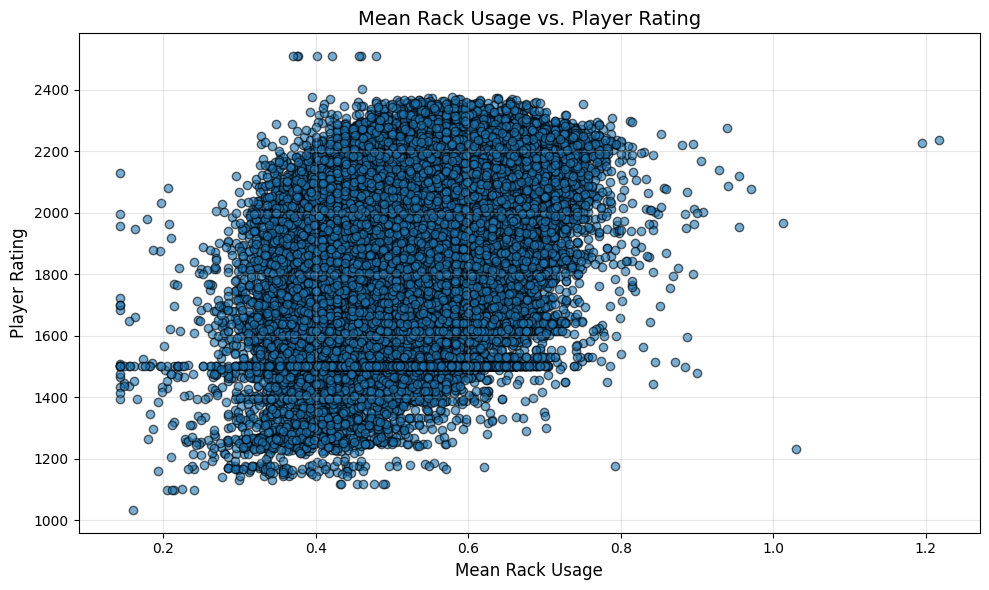

Scatter plot saved to ../output_EDA/combined_data_graphs/mean_rack_usage_vs_player_rating.png


In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define output paths
output_path_train = '../preprocessed_data/new_train.csv'
output_path_test = '../preprocessed_data/new_test.csv'
output_path_scatter_plot = '../output_EDA/combined_data_graphs/mean_rack_usage_vs_player_rating.png'

# Load the datasets
turns_path = '../preprocessed_data/new_turns.csv'
train_path = '../data/train.csv'
test_path = '../data/test.csv'

# Read the data
turns = pd.read_csv(turns_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Calculate mean rack usage per player per game
mean_rack_usage = turns.groupby(['game_id', 'nickname'])['rack_usage'].mean().reset_index()
mean_rack_usage.rename(columns={'rack_usage': 'mean_rack_usage'}, inplace=True)

# Merge mean rack usage into train.csv dataset
new_train = train.merge(mean_rack_usage, on=['game_id', 'nickname'], how='left')
new_test = test.merge(mean_rack_usage, on=['game_id', 'nickname'], how='left')

# Move the rating column to the end
columns = [col for col in new_train.columns if col != 'rating'] + ['rating']
new_train = new_train[columns]
columns = [col for col in new_test.columns if col != 'rating'] + ['rating']
new_test = new_test[columns]

# Display the last few rows of the updated train dataset
print(new_train.tail())
print(new_test.tail())

# Save the updated train.csv dataset
new_train.to_csv(output_path_train, index=False)
print(f"Updated train dataset saved to {output_path_train}")
new_test.to_csv(output_path_test, index=False)
print(f"Updated train dataset saved to {output_path_test}")

# Create a scatter plot: Mean Rack Usage vs. Player Rating
plt.figure(figsize=(10, 6))
plt.scatter(new_train['mean_rack_usage'], new_train['rating'], alpha=0.6, edgecolors='k')
plt.title("Mean Rack Usage vs. Player Rating", fontsize=14)
plt.xlabel("Mean Rack Usage", fontsize=12)
plt.ylabel("Player Rating", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
os.makedirs(os.path.dirname(output_path_scatter_plot), exist_ok=True)
plt.savefig(output_path_scatter_plot, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Scatter plot saved to {output_path_scatter_plot}")


## Merge intresting data from train.csv to games.csv

In [114]:
# Load datasets
games_path = '../data/games.csv'
train_path = '../data/train.csv'
test_path = '../data/test.csv'

games = pd.read_csv(games_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Combine train and test datasets
combined_data = pd.concat([train, test], ignore_index=True)

# Extract unique bot names and assign a unique ID to each bot
bot_names = combined_data['nickname'][combined_data['nickname'].str.contains('Bot', case=True, na=False)].unique()
bot_id_mapping = {bot_name: bot_id for bot_id, bot_name in enumerate(bot_names, start=1)}

# Add bot_id to combined data by mapping bot names
combined_data['bot_id'] = combined_data['nickname'].map(bot_id_mapping)

# Filter out records without a bot_id
bots_data = combined_data.dropna(subset=['bot_id'])

# Rename and drop unnecessary columns
bots_data = bots_data.rename(columns={'rating': 'bot_rating', 'nickname': 'bot_nickname'})
bots_data = bots_data.drop(columns=['score'], errors='ignore')  # Drop 'score' column if present

# Add bot information to games.csv
games = games.merge(bots_data, on='game_id', how='left')
display(games.tail())

# Save the updated games.csv with bot information
output_path = '../preprocessed_data/new_games.csv'
games.to_csv(output_path, index=False)

print(f"Updated games dataset with bot information saved to {output_path}")


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,bot_nickname,bot_rating,bot_id
72778,72769,browndav,blitz,STANDARD,0,09/07/2022 13:24,CSW21,180,0,RATED,1,218.043751,STEEBot,2110.0,2.0
72779,72770,HastyBot,regular,TIME,0,09/04/2022 0:13,CSW21,3600,0,RATED,1,3662.659287,HastyBot,2237.0,3.0
72780,72771,HastyBot,regular,STANDARD,0,09/19/2022 3:28,ECWL,900,0,CASUAL,10,236.133634,HastyBot,1614.0,3.0
72781,72772,Gtowngrad,regular,STANDARD,0,08/31/2022 15:57,NWL20,900,0,RATED,1,681.370077,BetterBot,1674.0,1.0
72782,72773,HastyBot,regular,STANDARD,1,08/27/2022 9:13,CSW21,1200,0,RATED,1,719.720262,HastyBot,2302.0,3.0


Updated games dataset with bot information saved to ../preprocessed_data/new_games.csv


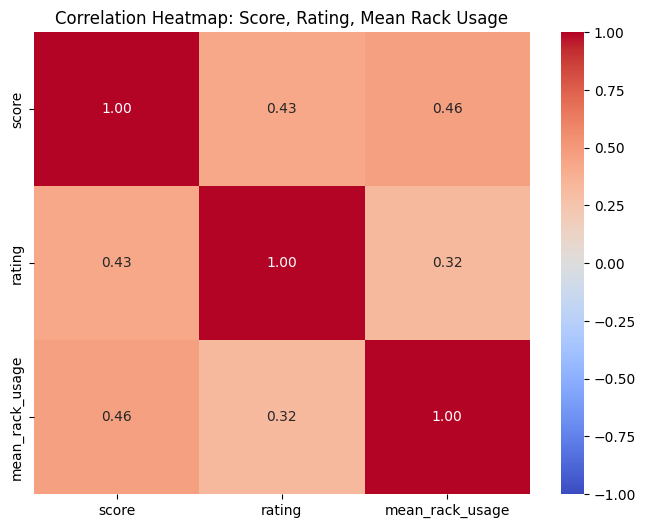

Correlation heatmap saved to: ../output_EDA/combined_data_graphs/correlation_heatmap.png


In [100]:
# Define the output path for the heatmap
output_path_heatmap = '../output_EDA/combined_data_graphs/correlation_heatmap.png'

# Load new_rain.csv
new_train = pd.read_csv('../preprocessed_data/new_train.csv')

# Select the relevant columns
correlation_data = new_train[['score', 'rating', 'mean_rack_usage']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Score, Rating, Mean Rack Usage')
plt.savefig(output_path_heatmap, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Correlation heatmap saved to: {output_path_heatmap}")

## Player Rating Progression over games

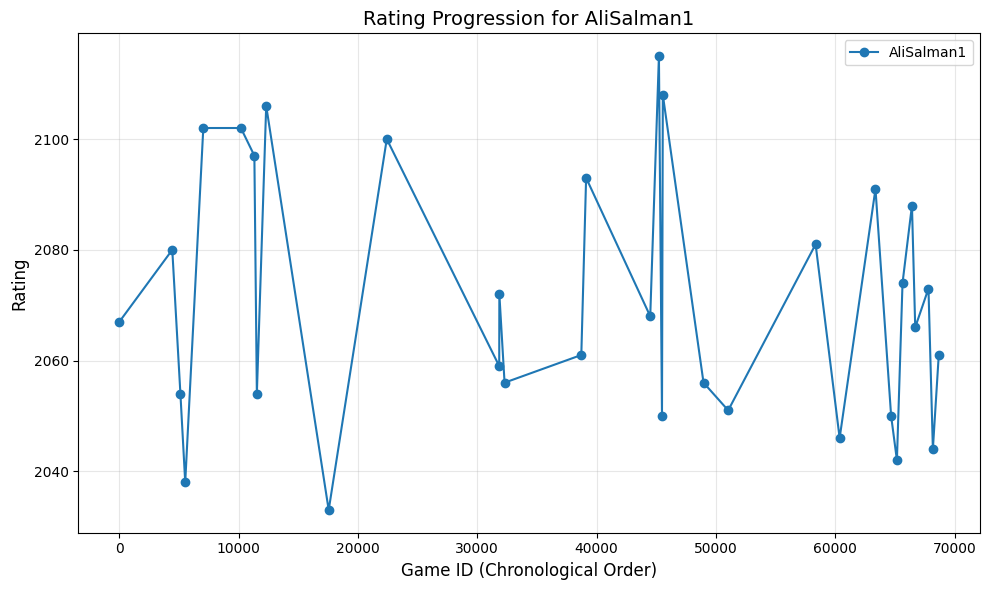

In [107]:
def plot_player_rating_progression(data, nickname):
    # Filter data for the specific player
    player_data = data[data['nickname'] == nickname].sort_values(by='game_id')
    
    if player_data.empty:
        print(f"No data found for player '{nickname}'")
        return
    
    # Plot the rating progression
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['game_id'], player_data['rating'], marker='o', linestyle='-', label=nickname)
    plt.title(f"Rating Progression for {nickname}", fontsize=14)
    plt.xlabel("Game ID (Chronological Order)", fontsize=12)
    plt.ylabel("Rating", fontsize=12)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

new_train = pd.read_csv('../preprocessed_data/new_train.csv')
plot_player_rating_progression(new_train, 'AliSalman1')


C:\Users\liavm\AppData\Local\Temp\ipykernel_14488\1735482298.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lexicon', data=human_players, order=human_players['lexicon'].value_counts().index, palette='viridis')


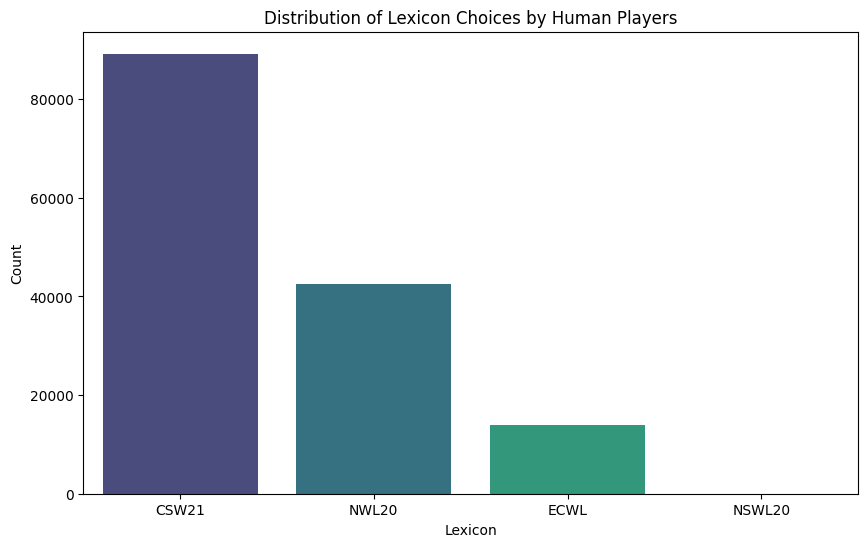

C:\Users\liavm\AppData\Local\Temp\ipykernel_14488\1735482298.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lexicon', y='rating', data=human_players, palette='viridis', order=human_players['lexicon'].value_counts().index)


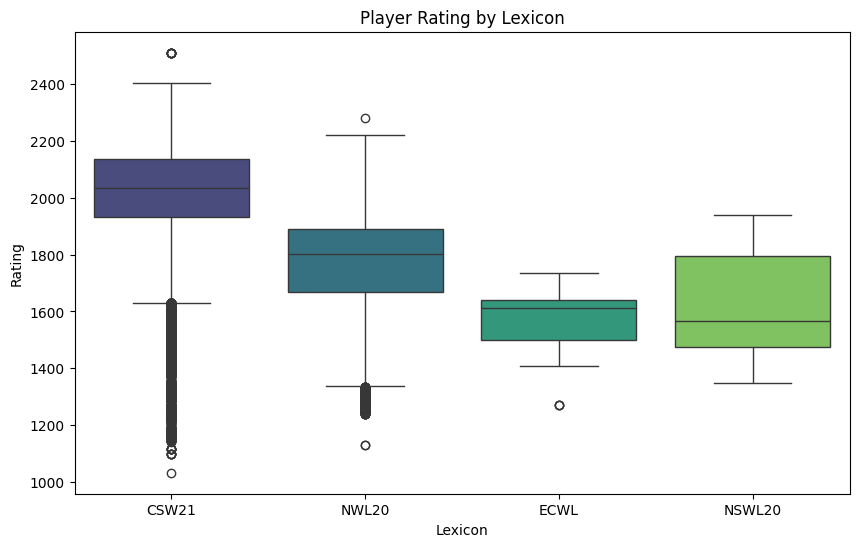

In [118]:
# Load the datasets
new_games_path = '../preprocessed_data/new_games.csv'
new_train_path = '../preprocessed_data/new_train.csv'
new_test_path = '../preprocessed_data/new_test.csv'

new_games = pd.read_csv(new_games_path)
new_train = pd.read_csv(new_train_path)
new_test = pd.read_csv(new_test_path)

# Combine train and test datasets for analysis
human_players = pd.concat([new_train, new_test], ignore_index=True)

# Merge lexicon information with human players
human_players = human_players.merge(new_games[['game_id', 'lexicon']], on='game_id', how='left')

# Plot lexicon distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='lexicon', data=human_players, order=human_players['lexicon'].value_counts().index, palette='viridis')
plt.title('Distribution of Lexicon Choices by Human Players')
plt.xlabel('Lexicon')
plt.ylabel('Count')
plt.savefig("lexicon_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot rating vs lexicon
plt.figure(figsize=(10, 6))
sns.boxplot(x='lexicon', y='rating', data=human_players, palette='viridis', order=human_players['lexicon'].value_counts().index)
plt.title('Player Rating by Lexicon')
plt.xlabel('Lexicon')
plt.ylabel('Rating')
plt.savefig("rating_vs_lexicon.png", dpi=300, bbox_inches='tight')
plt.show()

# Another EDA based on source data

## Clean Data

In [121]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sub = pd.read_csv('../data/sample_submission.csv')
turns = pd.read_csv('../data/turns.csv')
games = pd.read_csv('../data/games.csv')

In [122]:
bot_list = ['BetterBot', 'STEEBot', 'HastyBot', 'MasterBot']

In [130]:
brief_df = pd.concat([train, test], axis=0)
brief_df = brief_df.sort_values(["game_id"])
brief_df.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637.0
1,1,stevy,429,1500.0
1,2,BetterBot,401,2000.0
0,2,Super,488,NaN
3,3,BetterBot,318,2071.0


In [125]:
user_df = brief_df[~brief_df["nickname"].isin(bot_list)] 
user_df = user_df.rename(
    columns={"nickname": "user_name", "score": "user_score", "rating": "user_rating"}
) 

bot_df = brief_df[brief_df["nickname"].isin(bot_list)]

bot_df = bot_df.rename(
    columns={"nickname": "bot_name", "score": "bot_score", "rating": "bot_rating"}
)

In [126]:
user_df.head()


,game_id,user_name,user_score,user_rating
1,1,stevy,429,1500.0
0,2,Super,488,NaN
2,3,davidavid,440,1811.0
4,4,Inandoutworker,119,1473.0
6,5,stevy,325,1500.0


In [127]:
bot_df.head()

,game_id,bot_name,bot_score,bot_rating
0,1,BetterBot,335,1637.0
1,2,BetterBot,401,2000.0
3,3,BetterBot,318,2071.0
5,4,BetterBot,478,1936.0
7,5,STEEBot,427,1844.0


In [128]:
main_df = pd.merge(user_df, bot_df, on="game_id")
main_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating
0,1,stevy,429,1500.0,BetterBot,335,1637.0
1,2,Super,488,NaN,BetterBot,401,2000.0
2,3,davidavid,440,1811.0,BetterBot,318,2071.0
3,4,Inandoutworker,119,1473.0,BetterBot,478,1936.0
4,5,stevy,325,1500.0,STEEBot,427,1844.0


In [131]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72763 entries, 0 to 72762
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_id      72763 non-null  int64  
 1   user_name    72763 non-null  object 
 2   user_score   72763 non-null  int64  
 3   user_rating  50400 non-null  float64
 4   bot_name     72763 non-null  object 
 5   bot_score    72763 non-null  int64  
 6   bot_rating   72763 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.4+ MB


In [133]:
from sklearn.preprocessing import LabelEncoder
main_df["user_freq"] = main_df.groupby("user_name")["user_name"].transform("count")
encode_bots = LabelEncoder()
main_df["bot_name"] = encode_bots.fit_transform(main_df["bot_name"])
main_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,1,stevy,429,1500.0,0,335,1637.0,410
1,2,Super,488,NaN,0,401,2000.0,140
2,3,davidavid,440,1811.0,0,318,2071.0,254
3,4,Inandoutworker,119,1473.0,0,478,1936.0,205
4,5,stevy,325,1500.0,2,427,1844.0,410


In [134]:
# Checking for missing lables
missing_cols = main_df.columns[main_df.isnull().any()].tolist()
print(f'These lables have missing data that needs to be cleaned: {missing_cols} ')

These lables have missing data that needs to be cleaned: ['user_rating'] 


In [141]:
train_df = main_df[~main_df['user_rating'].isna()].reset_index(drop=True)
train_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,1,stevy,429,1500.0,0,335,1637.0,410
1,3,davidavid,440,1811.0,0,318,2071.0,254
2,4,Inandoutworker,119,1473.0,0,478,1936.0,205
3,5,stevy,325,1500.0,2,427,1844.0,410
4,6,HivinD,378,2029.0,2,427,2143.0,592


In [136]:
test_df  = main_df[main_df['user_rating'].isna()].reset_index(drop=True)
test_df.head()

,game_id,user_name,user_score,user_rating,bot_name,bot_score,bot_rating,user_freq
0,2,Super,488,NaN,0,401,2000.0,140
1,7,Priya1,379,NaN,2,377,2082.0,166
2,11,TileRunner,462,NaN,2,334,1829.0,269
3,14,Anfield223,359,NaN,2,403,2136.0,65
4,27,friesbasil,456,NaN,1,453,2258.0,528


In [140]:
train_df.to_csv('../cleaned_data/cleaned_train.csv', index=False)
test_df.to_csv('../cleaned_data/cleaned_test.csv', index=False)

## EDA on Cleaned Data

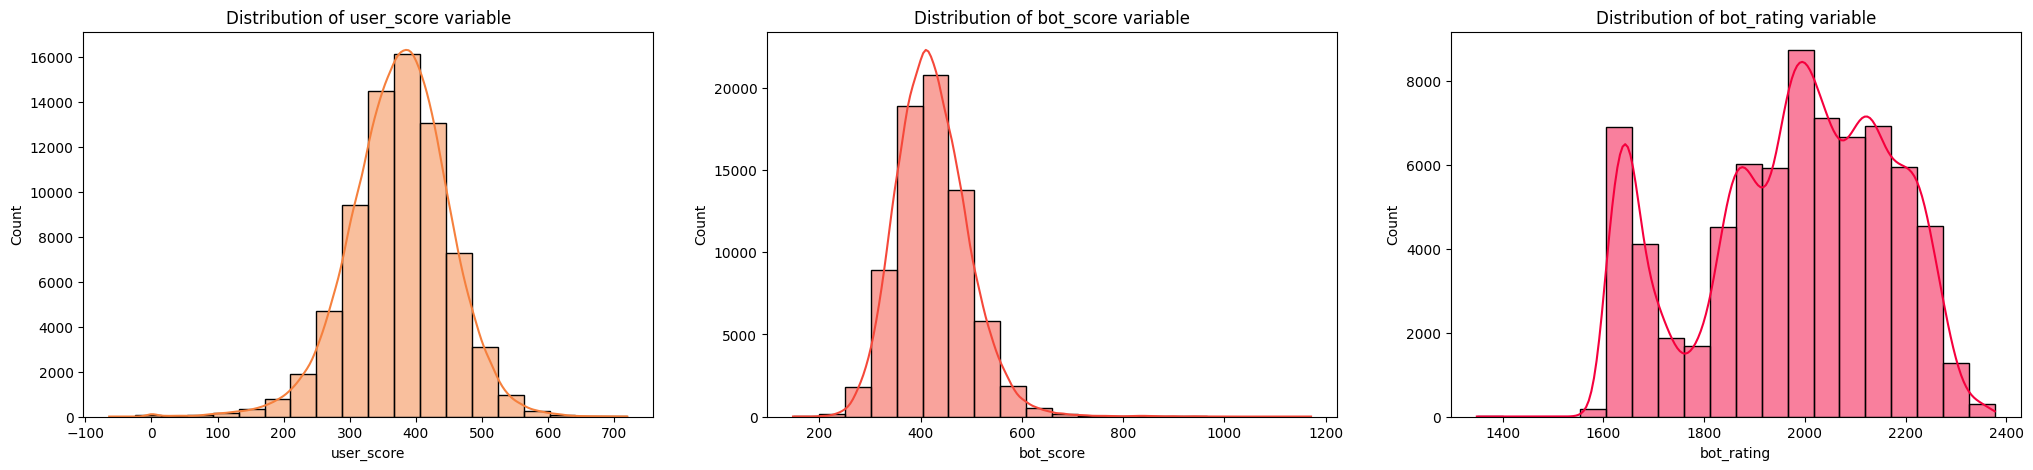

Plots saved to: ../output_EDA/cleaned_data_based_output/score_and_rating_distributions.png


In [146]:
# Define output path for the figure
output_path_histograms = '../output_EDA/cleaned_data_based_output/score_and_rating_distributions.png'

# Create subplots for the histograms
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
ax = axes.flatten()

sns.histplot(ax=axes[0], x=main_df["user_score"], bins=20, kde=True, color="#f5803d").set(title="Distribution of user_score variable")
sns.histplot(ax=axes[1], x=main_df["bot_score"], bins=20, kde=True, color="#f5483a").set(title="Distribution of bot_score variable")
sns.histplot(ax=axes[2], x=main_df["bot_rating"], bins=20, kde=True, color="#f5003d").set(title="Distribution of bot_rating variable")

# Save the figure
os.makedirs(os.path.dirname(output_path_histograms), exist_ok=True)
plt.savefig(output_path_histograms, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Plots saved to: {output_path_histograms}")

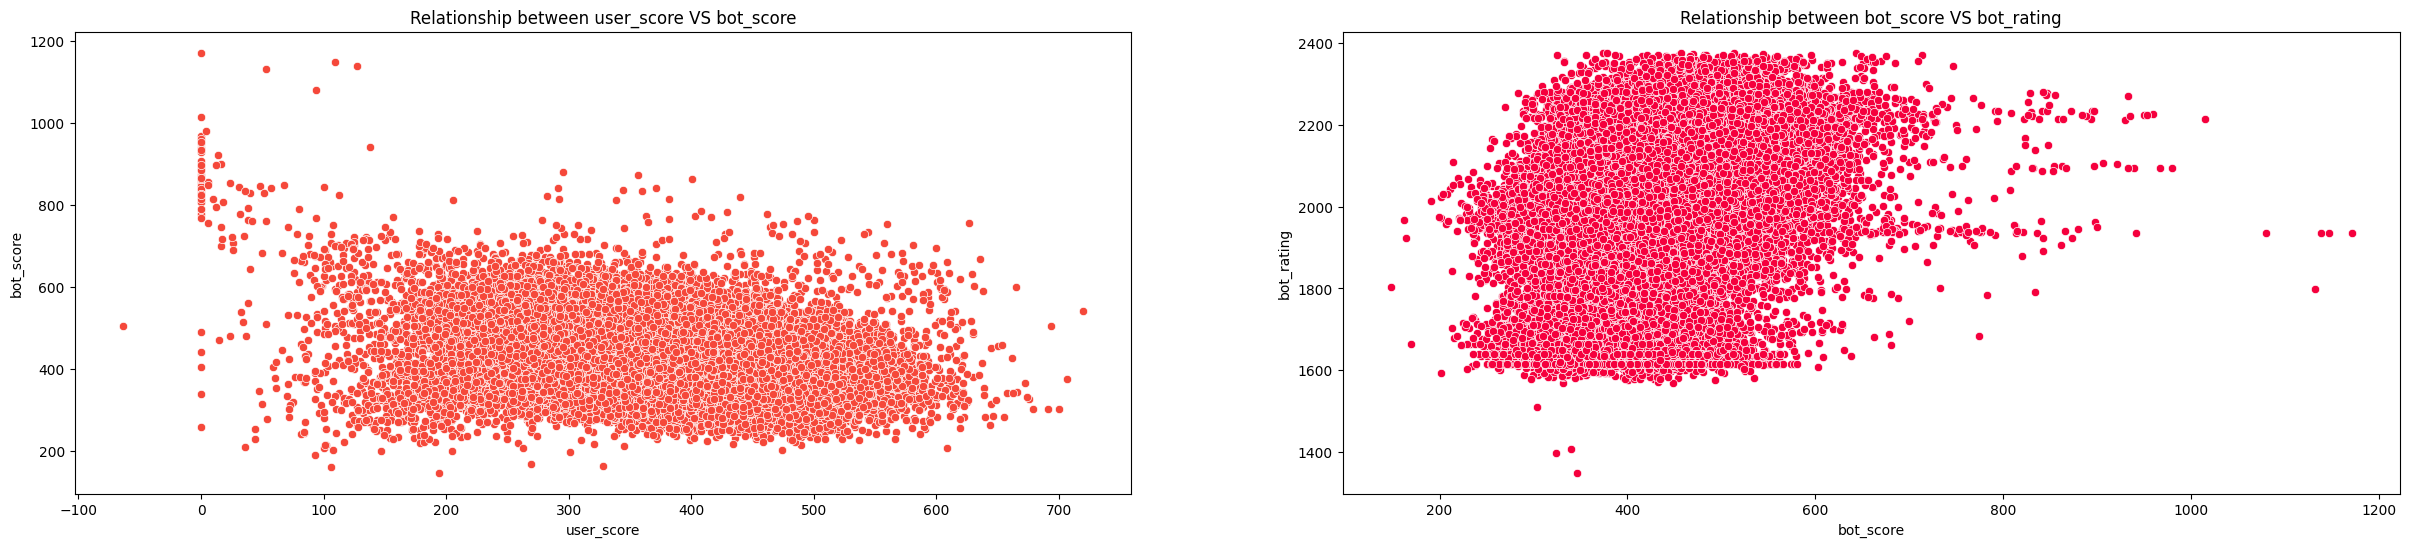

Scatter plots saved to: ../output_EDA/cleaned_data_based_output/score_and_rating_relationships.png


In [148]:
# Define output path for the figure
output_path_scatterplots = '../output_EDA/cleaned_data_based_output/score_and_rating_relationships.png'

# Create subplots for the scatter plots
fig, axes = plt.subplots(1, 2, figsize=(30, 6))
axes = axes.flatten()

sns.scatterplot(ax=axes[0], x="user_score", y="bot_score", data=main_df, color="#f5483a"
                ).set(title="Relationship between user_score VS bot_score")
sns.scatterplot(ax=axes[1], x="bot_score", y="bot_rating", data=main_df, color="#f5003d"
                ).set(title="Relationship between bot_score VS bot_rating")

# Save the figure
os.makedirs(os.path.dirname(output_path_scatterplots), exist_ok=True)
plt.savefig(output_path_scatterplots, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f"Scatter plots saved to: {output_path_scatterplots}")

# Try to explain the average points per turn number pick on later turns

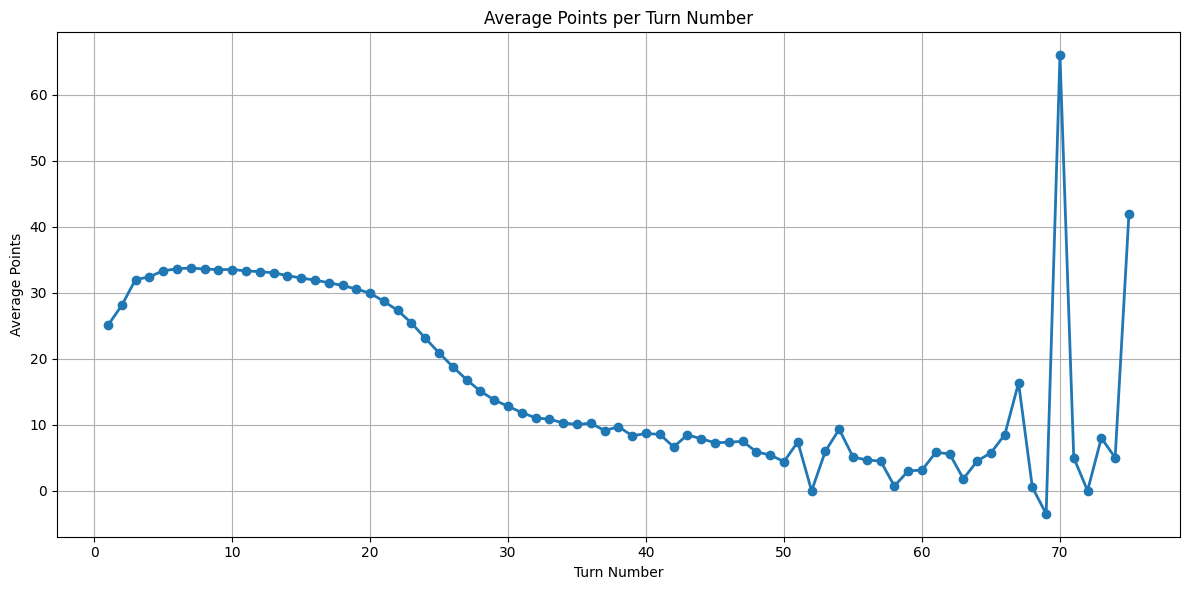

In [185]:
# Read the CSV file
file_path = '../data/source_data/turns.csv'  # Replace with your actual file path
turns = pd.read_csv(file_path)

# Calculate the average score per turn number
average_score_per_turn = turns.groupby("turn_number")["points"].mean()

# Plot the data as a line graph
plt.figure(figsize=(12, 6))
plt.plot(average_score_per_turn.index, average_score_per_turn.values, marker='o', linestyle='-', linewidth=2)
plt.title("Average Points per Turn Number")
plt.xlabel("Turn Number")
plt.ylabel("Average Points")
plt.grid(True)
plt.tight_layout()
plt.show()

In [189]:
turns[turns["turn_number"] == 70]

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
1316986,47809,70,BetterBot,?INSTTU,3B,STUNTI.g,66,731,Play


In [190]:
game = pd.read_csv("../data/source_data/games.csv")
game[game["game_id"]==47809]

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
47808,47809,Wgaming,rapid,STANDARD,0,09/03/2022 9:40,CSW21,780,1,CASUAL,0,134.719805


In [192]:
turns[turns["game_id"]==47809].tail(20)

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
1316972,47809,56,BetterBot,NUDRFES,NaN,(challenge),5,550,Challenge
1316973,47809,57,Wgaming,AAAIMYZ,NaN,-,0,0,Pass
1316974,47809,58,BetterBot,DEFNRSU,14J,FR.ED,34,584,Play
1316975,47809,59,BetterBot,RAIINSU,NaN,(challenge),5,589,Challenge
1316976,47809,60,Wgaming,AAAIMYZ,NaN,-,0,0,Pass
1316977,47809,61,BetterBot,AIINRSU,5C,URINA.,16,605,Play
1316978,47809,62,BetterBot,IHTVUIS,NaN,(challenge),5,610,Challenge
1316979,47809,63,Wgaming,AAAIMYZ,NaN,-,0,0,Pass
1316980,47809,64,BetterBot,HIISTUV,M3,HIV.,20,630,Play
1316981,47809,65,BetterBot,NUHISTU,NaN,(challenge),5,635,Challenge


## Reason for pick in 70 and 75 is a single sample of that case only for game_id = 47809
### We can consider all the turn numbers over 50 as outlier
## To prove this assumption: Let's create a distribution of number of turns for each game


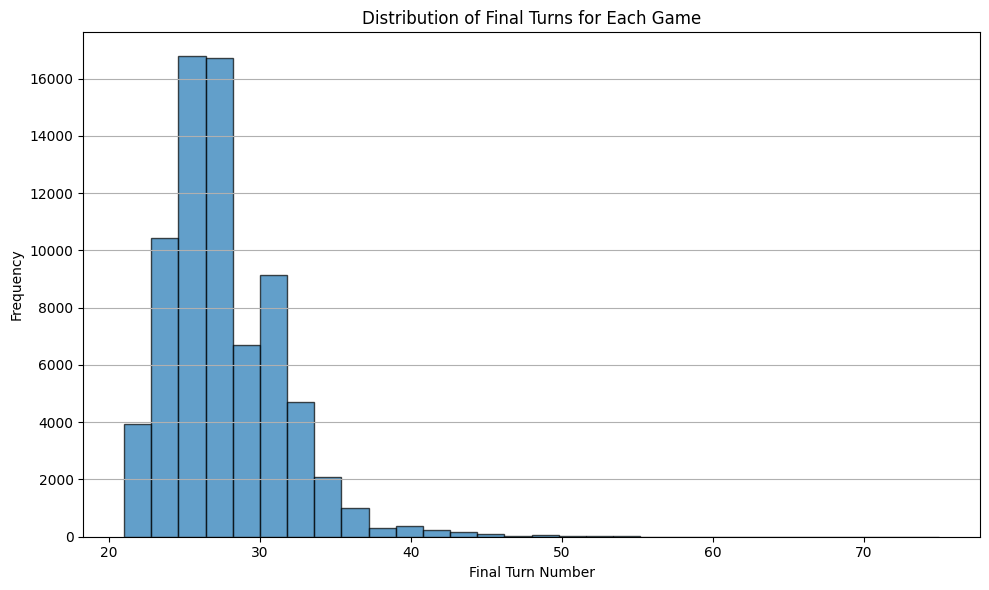

In [195]:
# Read the CSV file
file_path = '../data/source_data/turns.csv'  
turns = pd.read_csv(file_path)

# Find the final turn for each game
final_turns = df.groupby("game_id")["turn_number"].max()

# Plot the distribution of final turn numbers
plt.figure(figsize=(10, 6))
plt.hist(final_turns, bins=30, alpha=0.7, edgecolor='black')
plt.title("Distribution of Final Turns for Each Game")
plt.xlabel("Final Turn Number")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig('../output_EDA/turns_invest_graphs/basic_invest/turns_per_game.png')
plt.show()

# Try to understand when we got negetive points for a turn

In [198]:
negetive_points_turns = turns[turns["points"] < 0]
negetive_points_turns.head(10)

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
535,20,5,Favournew,AKRRTXY,NaN,--,-45,19,Exchange
562,20,32,Favournew,NV,NaN,(time),-10,356,Timeout
833,31,7,AWFUL,?EIILRS,NaN,--,-80,58,Exchange
1004,37,24,derickalim,DGIRSUZ,NaN,--,-49,361,Exchange
1123,41,31,marvin,EER,NaN,(time),-10,295,Timeout
1126,42,3,DDarien,?CEGORS,NaN,--,-70,0,Exchange
1129,42,6,DDarien,?CEGORS,NaN,--,-71,0,Exchange
1142,42,19,DDarien,DEGGNNR,NaN,--,-20,181,Exchange
1173,43,18,chloe,AFNORSX,NaN,--,-33,341,Exchange
1383,51,6,Leo,BEIJMOU,NaN,--,-36,56,Exchange


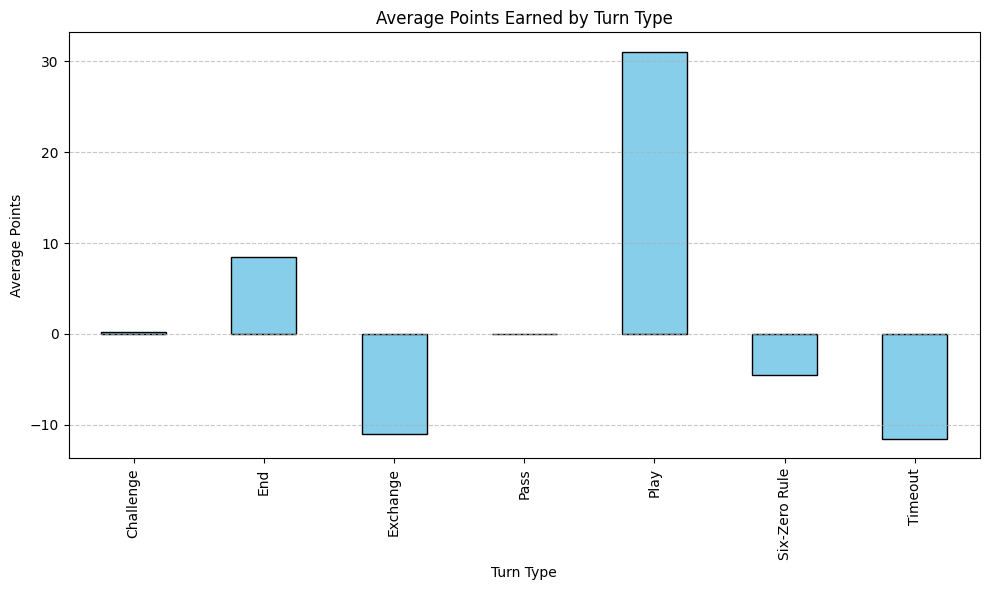

In [200]:
# Read the CSV file
file_path = '../data/source_data/turns.csv'  # Replace with your actual file path
turns = pd.read_csv(file_path)

# Group by turn_type and calculate the average points
turn_type_points = df.groupby("turn_type")["points"].mean()

# Plot the relationship between turn_type and points
plt.figure(figsize=(10, 6))
turn_type_points.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Points Earned by Turn Type")
plt.xlabel("Turn Type")
plt.ylabel("Average Points")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig('../output_EDA/turns_invest_graphs/basic_invest/turn_type_points.png')

# Show the plot
plt.show()

In [204]:
games = pd.read_csv('../data/source_data/games.csv')
display(games[games["game_id"] == 20])

turns = pd.read_csv('../data/source_data/turns.csv')
display(turns[turns["game_id"] == 20])


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
19,20,STEEBot,regular,STANDARD,0,09/05/2022 11:11,CSW21,1200,0,RATED,2,1240.288564


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
531,20,1,STEEBot,AAEINSU,8H,AUA,6,6,Play
532,20,2,Favournew,AABDNRT,9G,BAND,19,19,Play
533,20,3,STEEBot,EEEINOS,10F,EE,8,14,Play
534,20,4,Favournew,AKRRTXY,11D,TAXY,45,64,Play
535,20,5,Favournew,AKRRTXY,NaN,--,-45,19,Exchange
536,20,6,STEEBot,EGINOSS,10I,SO,13,27,Play
537,20,7,Favournew,AKRRTXY,11E,KAY,30,49,Play
538,20,8,STEEBot,EEGIINS,H11,SIEGE,32,59,Play
539,20,9,Favournew,EIORRTX,12C,EXIT,31,80,Play
540,20,10,STEEBot,EIMNOPU,13C,MUN,34,93,Play
